> ## Exploratory Data Analysis of the Used Car Auction Prices dataset
>> ### MDDB Group A - Team 1 - AI Methods for Business
>
>> ### Nadia Aflatounian
>> ### Max Heijmans
>> ### Carl Hümbs
>> ### Can Senturk

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 0</span>
    <h1 style="font-size: 30px;">Business question and sub questions</h1>
</div>

> The goal of this Jupyter notebook and EDA is to answer the business question put forward, namely:
>> Can the dealership use predictive models to identify vehicles with a high resale value? 
>
> Similarly, to help answer the business question holistically, the following sub questions need to be answered:
>> Which specific features in the dataset (such as make, model, year, and condition) are identified by the predictive models as the strongest predictors of high resale value?
>>
>> How do the age and condition of vehicles influence their predicted resale value according to the models? 
>>
>> How do the random forest and neural network models interpret market trends from historical data to predict future resale values of different vehicle types? 
>>
>> How accurately do the predictive models forecast resale values across different segments of vehicles (e.g., luxury vs. economy cars, SUVs vs. sedans) based on the dataset?
>>
>> What insights do the models provide about the influence of regional factors (such as state of sale) on the resale value of vehicles, and how can this information guide a dealership's purchasing decisions? 

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Importing the necessary libraries and reading the dataset</h1>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from datetime import datetime
import datetime
from sklearn.preprocessing import StandardScaler
import feather

In [2]:
# Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558811
There are 558811 rows and 16 columns in the dataset


In [3]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
car_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 2</span>
    <h1 style="font-size: 30px;">Cleaning the dataset</h1>
</div>

In [5]:
#renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [6]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [7]:
#Getting dataframe information
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   brand         548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [8]:
# Select columns with object or category data type
categorical_columns = car_df.select_dtypes(include=['object']).columns

# Describe only the categorical columns
car_df[categorical_columns].describe()


,brand,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


In [9]:
#Generating descriptive statistics upfront
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [10]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [11]:
#Getting all columns with categorical data
print("The categorical columns are:")
print(categorical_columns)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


#### Observations on Categoricals:

- ##### The transmission column is predominantly populated by vehicles with automatic transmission (more than 50%).
- ##### The vin, seller, saledate columns have high cardinality (a high number of unique values).
- ##### The color and interior columns are dominated by vehicles with black exterior and interior colours (more than 20%).
- ##### The brand column is predominantly populated by Ford vehicles (more than 15%).

#### Observations on Numericals:

- ##### The columns year, condition, odometer have no issues with their min/max values.
- ##### All column values still fall within reasonable ranges.
- ##### There are differences between the mean and median in the columns year, condition, odometer, mmr, selling price, suggesting potential variations.
- ##### Further review is necessary for the mmr column in preprocessing as the minimum value range is considerably distant from the mean and median.
- ##### An anomaly exists in the minimum selling price, suspected to be unknown data, thus imputed with a value of 1 or vehicles sold as part of a corporate program (gifts).

> #### Counting values

In [12]:
# Display value counts for categorical columns
for col in categorical_columns:
    print(f'''Value count columns {col}:''')
    print(car_df[col].value_counts())
    print()

# Display count of unique values for all columns
for column in car_df.columns:
    unique_count = car_df[column].nunique()
    print(f"Count of unique values in '{column}' column: {unique_count}")

Value count columns brand:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: brand, Length: 96, dtype: int64

Value count columns model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count columns trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count columns body:
Sedan          199437
SUV            1

#### Descriptive Statistics Observations:

- ##### The dataset comprises 558,811 rows and 16 columns.
- ##### here are no issues found with the names and content of each column.
- ##### Several columns still contain null/missing values: brand, model, trim, body, transmission, condition, odometer, color, interior.
- ##### The largest count of missing values is in the transmission column, totaling 65,353 entries (11.7% of the data).
- ##### It appears that there are no evident issues with the data types in each column (they are already appropriate).

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>vin</b></font></div>

In [13]:
# Show the frequency of VINs
vin_frequency = car_df['vin'].value_counts()
print("Count and Frequency of VINs:\n", vin_frequency)

Count and Frequency of VINs:
 wbanv13588cz57827    5
1ftfw1cv5afb30053    4
wp0ca2988xu629622    4
5n1ar1nn2bc632869    4
wddgf56x78f009940    4
                    ..
1p3ew65g7yv603989    1
4t1bf28b1yu016829    1
jtdbt1231y0082703    1
jtddr32t8y0063746    1
1ftfw1et2eke87277    1
Name: vin, Length: 550296, dtype: int64


In [14]:
# Find and aggregate rows for duplicate VINs
duplicate_vins = car_df[car_df.duplicated(subset='vin', keep=False)]
if not duplicate_vins.empty:
    aggregated_data = duplicate_vins.groupby('vin').agg({
        'sellingprice': 'mean',  # Aggregate selling prices (you can choose other aggregate functions)
        'odometer': 'mean'       # Aggregate odometer readings
        # Add more columns to aggregate as needed
    }).reset_index()

    # Display the aggregated data for duplicate VINs
    print("\nAggregated data for duplicate VINs:\n", aggregated_data)
else:
    print("\nNo cars sold more than once.")



Aggregated data for duplicate VINs:
                     vin  sellingprice  odometer
0     19uua5663ya022038        1050.0  105425.5
1     19uua65596a059705        8350.0   89701.0
2     19uua66215a070166        7350.0  131726.0
3     19uua66228a015410       10350.0   91839.0
4     19uua66228a024043       12850.0   78782.5
...                 ...           ...       ...
8321  zamce39a370028781       25150.0   39039.5
8322  zamce39a460025306       15500.0   92555.5
8323  zamce39a470026893       23250.0   46107.5
8324  zamfe39a970030502       30250.0   27925.5
8325  zfbcfabh4ez025834       10850.0   11474.0

[8326 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Missing Values</b></font></div>

#### Handling missing Values:
- ##### Imputing categorical values according to the most frequent likely category
- ##### Imputing numerical values according to either mode, mean or mode
- ##### The columns year, vin, state, seller, mmr, saledate, and sellingprice do not have any missing values, so there's no need for handling them.

In [15]:
#Checking for missing values
missing_values_count = car_df.isnull().sum()
missing_values_percentage = (missing_values_count / len(car_df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

missing_data_summary = missing_data_summary.sort_values(by='Missing Values Count', ascending=False)

print("Missing values in each column:")
print(missing_data_summary)

Missing values in each column:
              Missing Values Count  Missing Values Percentage
transmission                 65353                  11.695010
body                         13195                   2.361263
condition                    11794                   2.110553
trim                         10651                   1.906011
model                        10399                   1.860915
brand                        10301                   1.843378
color                          749                   0.134035
interior                       749                   0.134035
odometer                        94                   0.016821
year                             0                   0.000000
vin                              0                   0.000000
state                            0                   0.000000
seller                           0                   0.000000
mmr                              0                   0.000000
sellingprice                     0     

In [16]:
# Define the columns to impute
columns_to_impute = ['transmission', 'brand', 'model', 'body', 'trim']

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
car_df[columns_to_impute] = imputer.fit_transform(car_df[columns_to_impute])


### 2.1 Imputing missing values for 'condition'

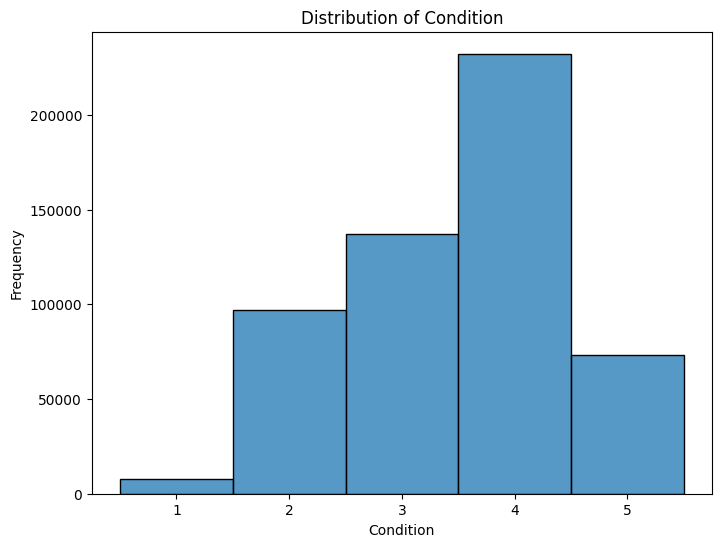

In [17]:
# Plotting the distribution of 'condition'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['condition'].dropna(), discrete=True)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be normally distributed, we will use the Mean to imoute the missing values:

In [18]:
# Impute missing values in the 'condition' column with the mean
condition_mean = car_df['condition'].mean()
car_df['condition'].fillna(condition_mean, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['condition'].isnull().sum()
print("Missing values in 'condition' after imputation:", missing_values_after_imputation)

Missing values in 'condition' after imputation: 0


### 2.2 Imputing missing values for 'odometer'

Plotting the distribution of condition and odemeter, to see if we should use mean or meadian to impute the missing values.

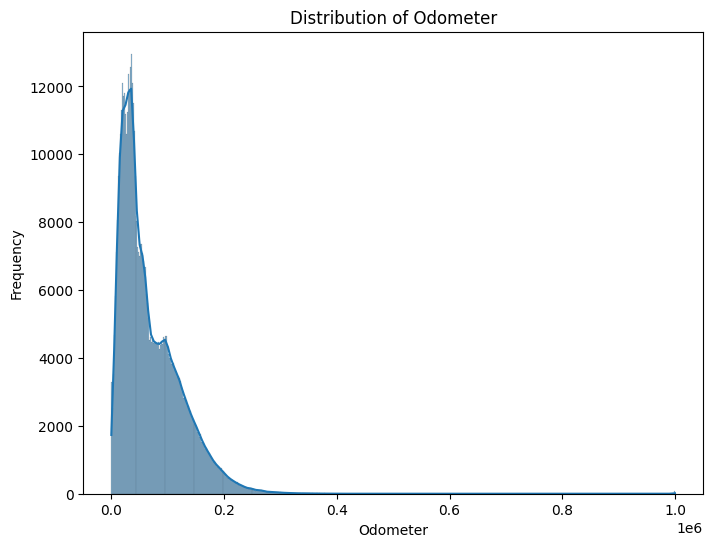

In [19]:
# Plotting the distribution of 'odometer'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['odometer'].dropna(), kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be skewed to the left, we will use the Median to imoute the missing values:

In [20]:
# Impute missing values in the 'odometer' column with the median
odometer_median = car_df['odometer'].median()
car_df['odometer'].fillna(odometer_median, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['odometer'].isnull().sum()
print("Missing values in 'odometer' after imputation:", missing_values_after_imputation)

Missing values in 'odometer' after imputation: 0


### 2.3 Imputing missing values for 'color'

In [21]:
print("Data type of 'interior' column:", car_df['color'].dtype)

Data type of 'interior' column: object


As 'color' is a categorical variable, we use Mode to impute missing values:

In [22]:
# Calculate the mode of the 'color' column
color_mode = car_df['color'].mode()[0]

# Fill missing values in the 'color' column with the mode
car_df['color'].fillna(color_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['color'].isnull().sum()
print("Missing values in 'color' after imputation:", missing_values_after_imputation)

Missing values in 'color' after imputation: 0


### 2.4 Imputing missing values for 'interior'

In [23]:
print("Data type of 'interior' column:", car_df['interior'].dtype)

Data type of 'interior' column: object


As 'interior' is a categorical variable, we use Mode to impute missing values:

In [24]:
# Calculate the mode of the 'interior' column
interior_mode = car_df['interior'].mode()[0]

# Fill missing values in the 'interior' column with the mode
car_df['interior'].fillna(interior_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['interior'].isnull().sum()
print("Missing values in 'interior' after imputation:", missing_values_after_imputation)

Missing values in 'interior' after imputation: 0


### Finally: checking if there are still empty values left:

In [25]:
#Checking for null values again to check the previous code
car_df.isna().sum().sort_values(ascending=False)

year            0
brand           0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Mapping and capitalising columns</b></font></div>

##### We've observed inconsistencies in the way brand names are written—some are in abbreviations or lack proper capitalisation. By mapping these brand names, we aim to unify them for consistency and ensure they are uniformly represented.

In [26]:
# Displaying the number of unique values in 'brand' and 'body' columns before mapping
print("Number of unique values in 'brand' column before mapping:", car_df['brand'].nunique())
print("Number of unique values in 'body' column before mapping:", car_df['body'].nunique())

Number of unique values in 'brand' column before mapping: 96
Number of unique values in 'body' column before mapping: 86


In [27]:
mapping_dict = {
    'brand': {'vw': 'Volkswagen', 'ford tk': 'Ford', 'ford truck': 'Ford', 'chev truck': 'Chevrolet',
              'dodge tk': 'Dodge', 'hyundai tk': 'Hyundai', 'bmw': 'BMW', 'mercedes-b': 'Mercedes-Benz',
              'mercedes': 'Mercedes-Benz', 'gmc': 'GMC', 'gmc truck': 'GMC', 'mazda tk': 'Mazda', 
              'landrover': 'Land Rover'},
}

#Apply mapping to the specified 'body' column in the 'car_df' DataFrame
car_df['body'] = car_df['body'].replace(mapping_dict.get('body', {}))

In [28]:
# Function to categorize body types
def categorize_body(body_type):
    body_type = str(body_type).lower()  # Convert to lowercase for uniformity
    
    if 'suv' in body_type:
        return 'SUV'
    elif 'coupe' in body_type:
        return 'Coupe'
    elif 'convertible' in body_type:
        return 'Convertible'
    elif 'sedan' in body_type:
        return 'Sedan'
    elif 'cab' in body_type:
        return 'Cab'
    elif 'van' in body_type:
        return 'Van'
    else:
        return 'Other'

# Apply the categorize_body function to the 'body' column in the 'car_df' DataFrame
car_df['body'] = car_df['body'].apply(categorize_body)

In [29]:
columns_to_check = ['brand', 'body']

for column in columns_to_check:
    print(f"Number of unique values in '{column}' column before mapping:", car_df[column].nunique())

Number of unique values in 'brand' column before mapping: 96
Number of unique values in 'body' column before mapping: 7


In [30]:
#Function for capitalising
def capitalise(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))
    return df

In [31]:
# List of columns to capitalise
columns_to_capitalise = ['brand', 'model', 'trim', 'body', 'transmission', 'color', 'interior','seller']

# Apply capitalisation to the specified columns in the 'car_df' DataFrame
car_df = capitalise(car_df, columns_to_capitalise)

In [32]:
for column in columns_to_check:
    if column in mapping_dict:
        car_df[column] = car_df[column].replace(mapping_dict[column])

for column in columns_to_check:
    print(f"Number of unique values in '{column}' column after mapping:", car_df[column].nunique())

Number of unique values in 'brand' column after mapping: 66
Number of unique values in 'body' column after mapping: 7


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Duplicates</b></font></div>

In [33]:
#Checking duplicates
duplicates = car_df.duplicated().sum()
if duplicates == 0:
    print("There are " + str(duplicates) + " in the dataset")
else:
    print("There are" + str(duplicates) + "in the dataset")
# print("Duplicate values: " + str(duplicates))

There are 0 in the dataset


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Cleaning Colours</b></font></div>

In [34]:
def clean_colours(df):
    # Define a function to clean colours for both 'color' and 'interior' columns
    def clean_colour_data(col):
        # Define mapping for similar colours to be merged and categorised
        similar_colours = {
            'Burgundy': 'Red',
            'Charcoal': 'Black',
            'Off-white': 'White',
            'Gray': 'Silver',
            'Turquoise': 'Blue',
            '—': 'Other',
        }

        # Categorise colours as per the specified categories
        col.replace(similar_colours, inplace=True)
        
        # For 'interior' column, categorise other colours into 'Other' category excluding Red, White, and Blue
        if col.name == 'interior':
            col[col.isin(['Silver', 'Black', 'Beige', 'Tan']) == False] = 'Other'
        
        # For 'color' column, merge Beige and Tan into a single category 'Beige/Tan'
        if col.name == 'color':
            col[col.isin(['Beige', 'Tan'])] = 'Beige/Tan'
            # Categorise other colours into 'Other' category
            col[col.isin(['Silver', 'Black', 'Red', 'White', 'Blue']) == False] = 'Other'

    # Clean 'color' column
    clean_colour_data(df['color'])

    # Clean 'interior' column
    clean_colour_data(df['interior'])

In [35]:
# Display unique values in the 'color' column before cleaning and add whitespace
unique_colours_before_cleaning = car_df['color'].unique()
print(f"{unique_colours_before_cleaning}\n")

# Display count of each unique value in the 'color' column before cleaning
colour_counts_before_cleaning = car_df['color'].value_counts()
print(colour_counts_before_cleaning)

['White' 'Gray' 'Black' 'Red' 'Silver' 'Blue' 'Brown' 'Beige' 'Purple'
 'Burgundy' '—' 'Gold' 'Yellow' 'Green' 'Charcoal' 'Orange' 'Off-white'
 'Turquoise' 'Pink' 'Lime']

Black        111719
White        106673
Silver        83389
Gray          82857
Blue          51139
Red           43569
—             24685
Green         11382
Gold          11342
Beige          9222
Burgundy       8972
Brown          6717
Orange         2078
Purple         1561
Off-white      1449
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64


In [36]:
#Display unique values in the 'interior' column before cleaning
unique_interiors_before_cleaning = car_df['interior'].unique()
print(f"{unique_interiors_before_cleaning}\n")

#Display unique values in the 'interior' column before cleaning
count_interiors_before_cleaning = car_df['interior'].value_counts()
print(count_interiors_before_cleaning)

['Black' 'Beige' 'Tan' '—' 'Gray' 'Brown' 'Burgundy' 'White' 'Silver'
 'Off-white' 'Blue' 'Red' 'Yellow' 'Green' 'Purple' 'Orange' 'Gold']

Black        245074
Gray         178578
Beige         59758
Tan           44093
—             17076
Brown          8640
Red            1359
Blue           1138
Silver         1099
Off-white       480
Purple          339
Gold            324
White           252
Green           245
Burgundy        191
Orange          145
Yellow           20
Name: interior, dtype: int64


In [37]:
#Applying the function to map colours in 'color' and 'interior' columns
clean_colours(car_df)

/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_49558/2216544566.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col.isin(['Beige', 'Tan'])] = 'Beige/Tan'
/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_49558/2216544566.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col.isin(['Silver', 'Black', 'Red', 'White', 'Blue']) == False] = 'Other'
/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_49558/2216544566.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [38]:
# Display unique colours after cleaning in the 'color' column
unique_colours_after_cleaning = car_df['color'].unique()
print("Unique colours after cleaning:")
print(unique_colours_after_cleaning)

# Display count of each unique colour after cleaning in the 'color' column
colour_counts_after_cleaning = car_df['color'].value_counts()
print("\nCount of each unique colour after cleaning:")
print(colour_counts_after_cleaning)

# Display unique interior colours after cleaning in the 'interior' column
unique_interiors_after_cleaning = car_df['interior'].unique()
print("\nUnique interior colours after cleaning:")
print(unique_interiors_after_cleaning)

# Display count of each unique interior colour after cleaning in the 'interior' column
count_interiors_after_cleaning = car_df['interior'].value_counts()
print("\nCount of each interior colour after cleaning:")
print(count_interiors_after_cleaning)

Unique colours after cleaning:
['White' 'Silver' 'Black' 'Red' 'Blue' 'Other']

Count of each unique colour after cleaning:
Silver    166246
Black     112198
White     108122
Other      68329
Red        52541
Blue       51375
Name: color, dtype: int64

Unique interior colours after cleaning:
['Black' 'Beige' 'Tan' 'Other' 'Silver']

Count of each interior colour after cleaning:
Black     245074
Silver    179677
Beige      59758
Tan        44093
Other      30209
Name: interior, dtype: int64


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>brand_model</b></font></div>

In [39]:
# Create a new column 'Brand_Model_Combination' by concatenating 'brand' and 'model'
car_df['brand_model'] = car_df['brand'] + '_' + car_df['model']

# Display the new column
print(car_df['brand_model'])

0                     Kia_Sorento
1                     Kia_Sorento
2                    Bmw_3 Series
3                       Volvo_S60
4         Bmw_6 Series Gran Coupe
                   ...           
558806                   Kia_K900
558807                   Ram_2500
558808                     Bmw_X5
558809              Nissan_Altima
558810                 Ford_F-150
Name: brand_model, Length: 558811, dtype: object


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 3</span>
    <h1 style="font-size: 30px;">Limiting the number of unique values</h1>
</div>

### 3.1 Creating a new column that combines 'brand' and 'model'

### 3.2 Cleaning the states aka looking at frequency

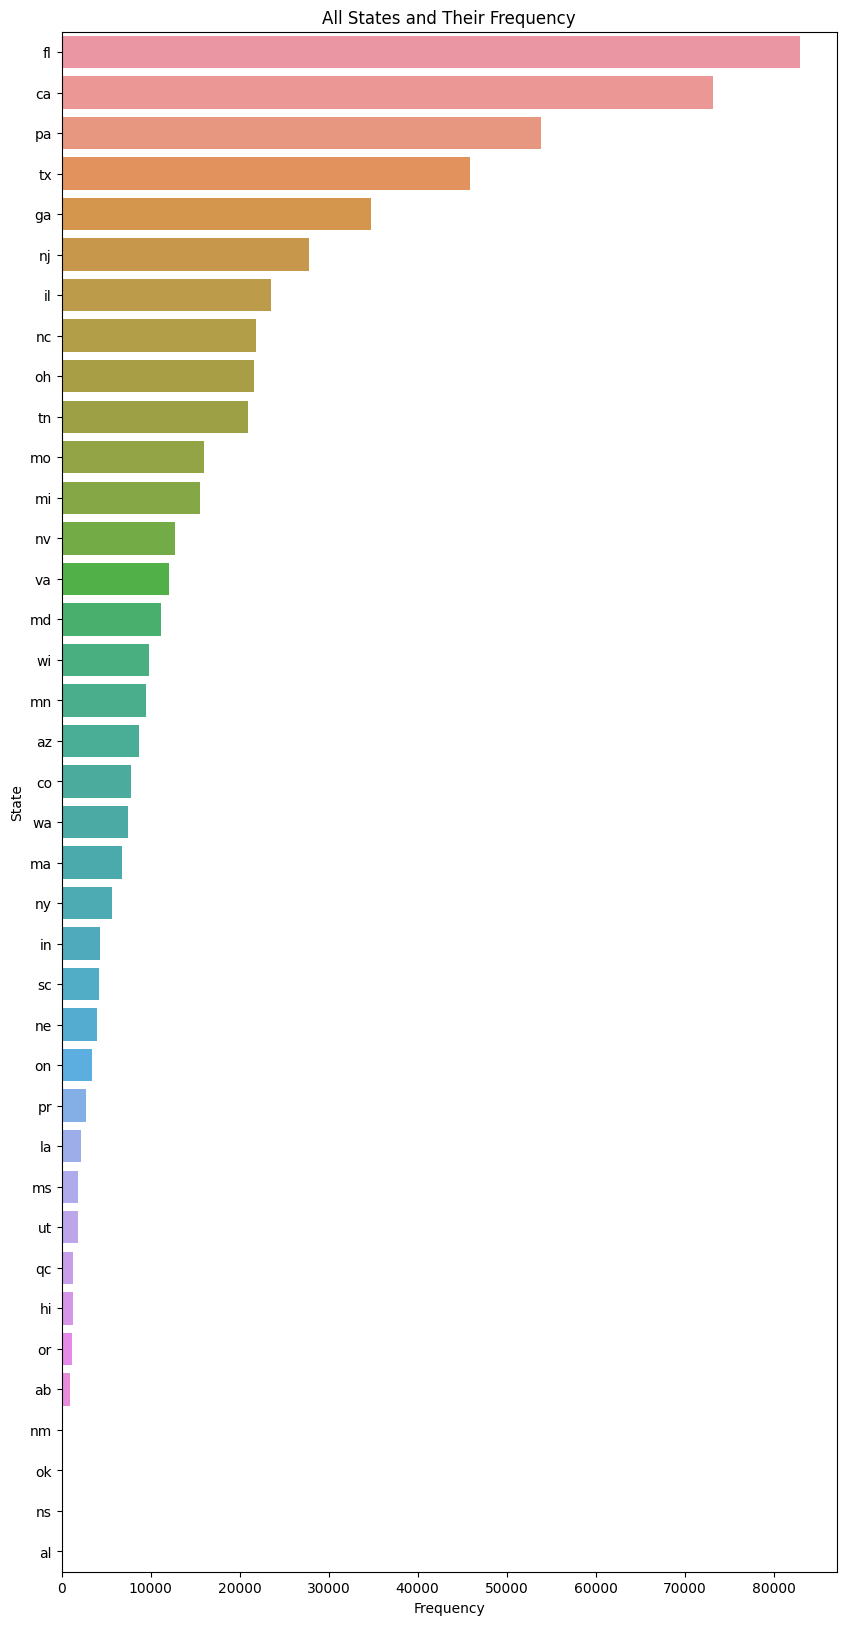

In [40]:
plt.figure(figsize=(10, 20))

# Plotting all states based on frequency
sns.countplot(y='state', data=car_df, order=car_df['state'].value_counts().index)
plt.title('All States and Their Frequency')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

As we see, these are just 38 states, so we can keeep all of them.

### 3.3 Cleaning 'body' column: identifying most frequently sold body styles

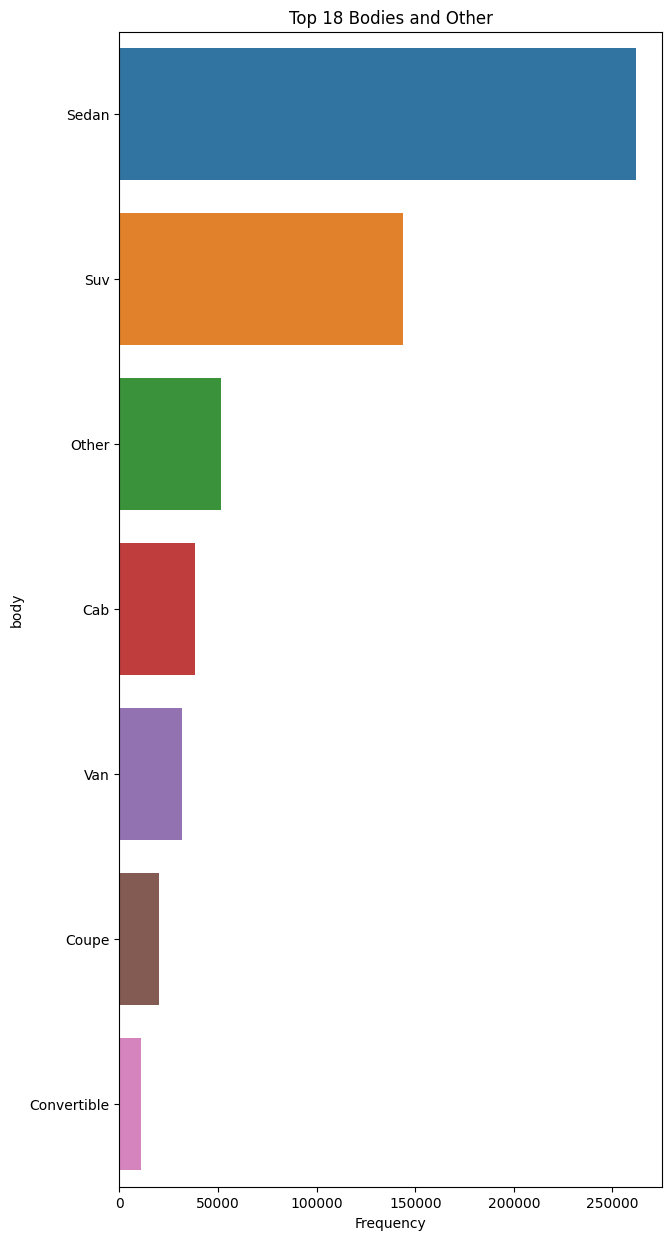

In [41]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_18_bodies = car_df['body'].value_counts().nlargest(18).index.tolist()


# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['body'] = car_df['body'].apply(lambda x: x if x in top_18_bodies else 'Other')


# Plotting the top 50 sellers based on frequency
sns.countplot(y='body', data=car_df, order=car_df['body'].value_counts().index)
plt.title('Top 18 Bodies and Other')
plt.xlabel('Frequency')
plt.ylabel('body')
plt.show()

In [42]:
## to be done: map the similar body types together

### 3.4 Cleaning the 'sellers': Only looking at the top sellers

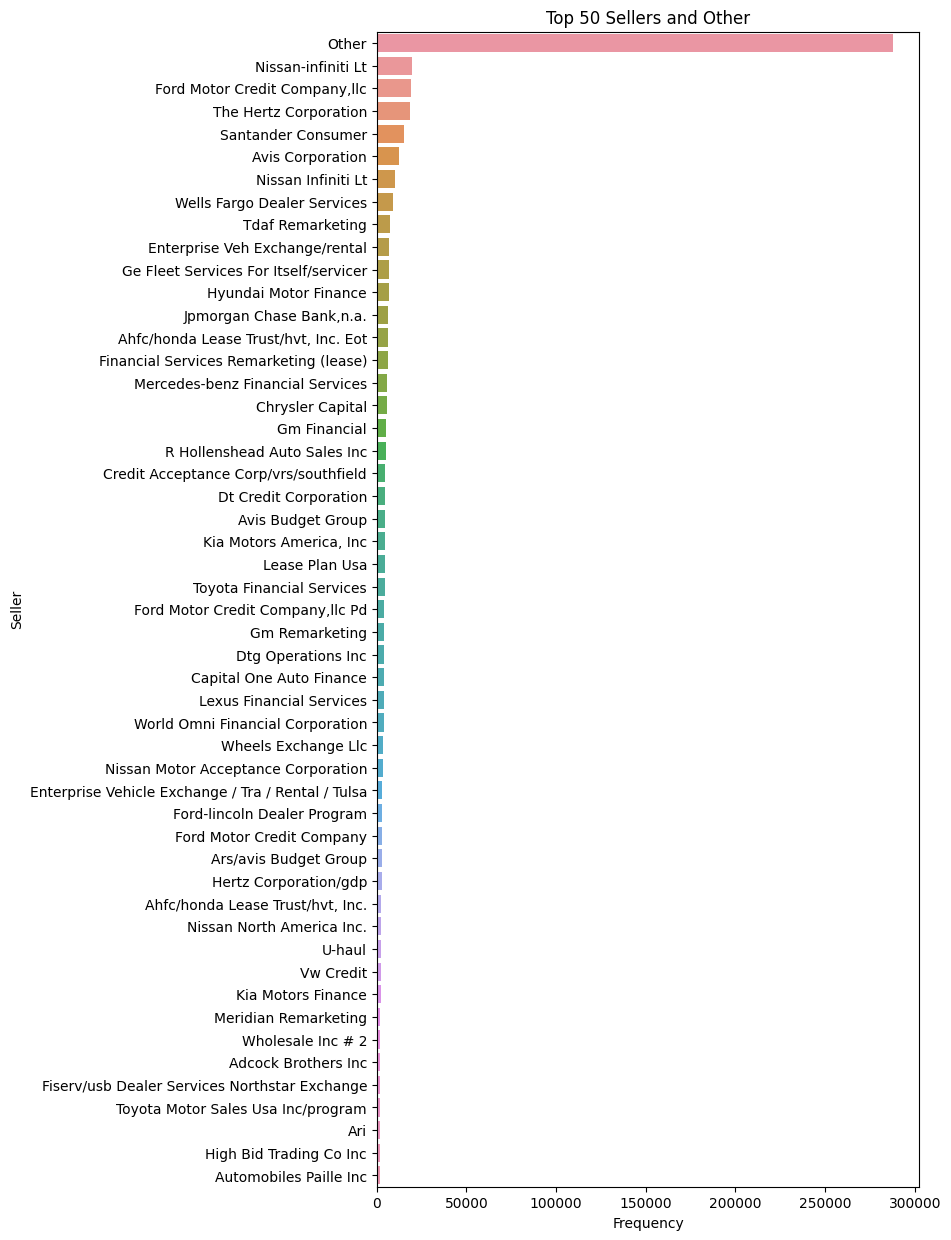

In [43]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_50_sellers = car_df['seller'].value_counts().nlargest(50).index.tolist()

# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'Other')

# Plotting the top 50 sellers based on frequency
sns.countplot(y='seller', data=car_df, order=car_df['seller'].value_counts().index)
plt.title('Top 50 Sellers and Other')
plt.xlabel('Frequency')
plt.ylabel('Seller')
plt.show()

Chaning all sellers that are not in the top 50 to 'Other'.

In [44]:
# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'other')

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Exploratory Data Analysis</h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Univariate Analysis</h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Boxplots for numericals</b></font></div>

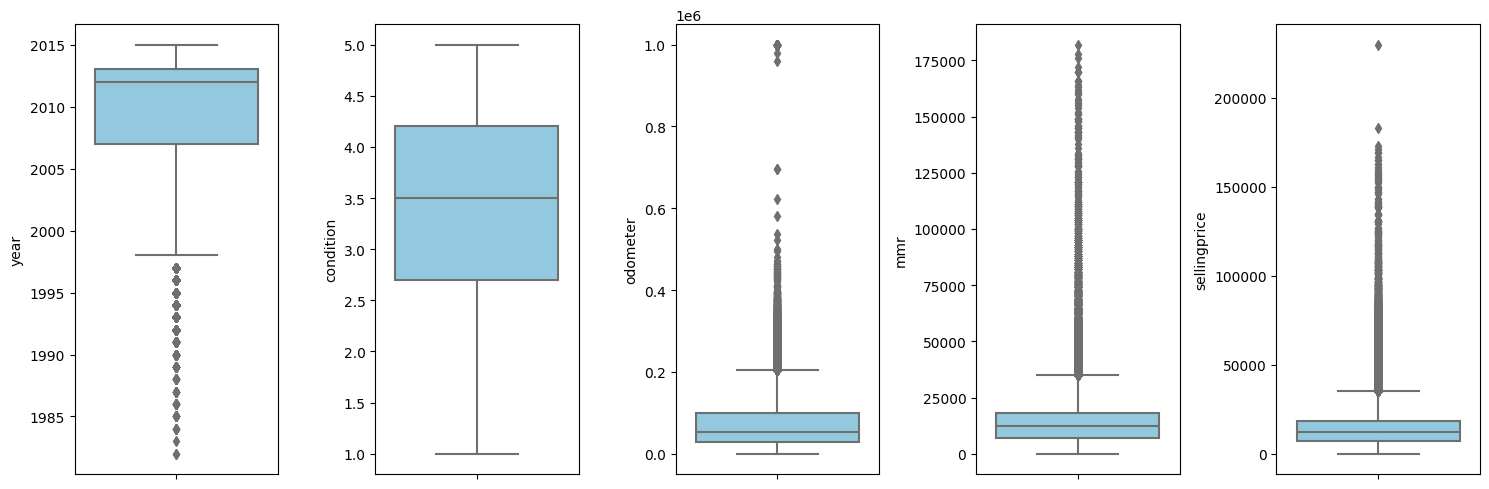

In [45]:
num_features = numerical_col
plt.figure(figsize=(15, 5))  # Adjust the width and height as needed
box = num_features
for i in range(0, len(box)):
    plt.subplot(1, len(box), i + 1)
    sns.boxplot(y=car_df[box[i]], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>KDE Plot for numericals</b></font></div>

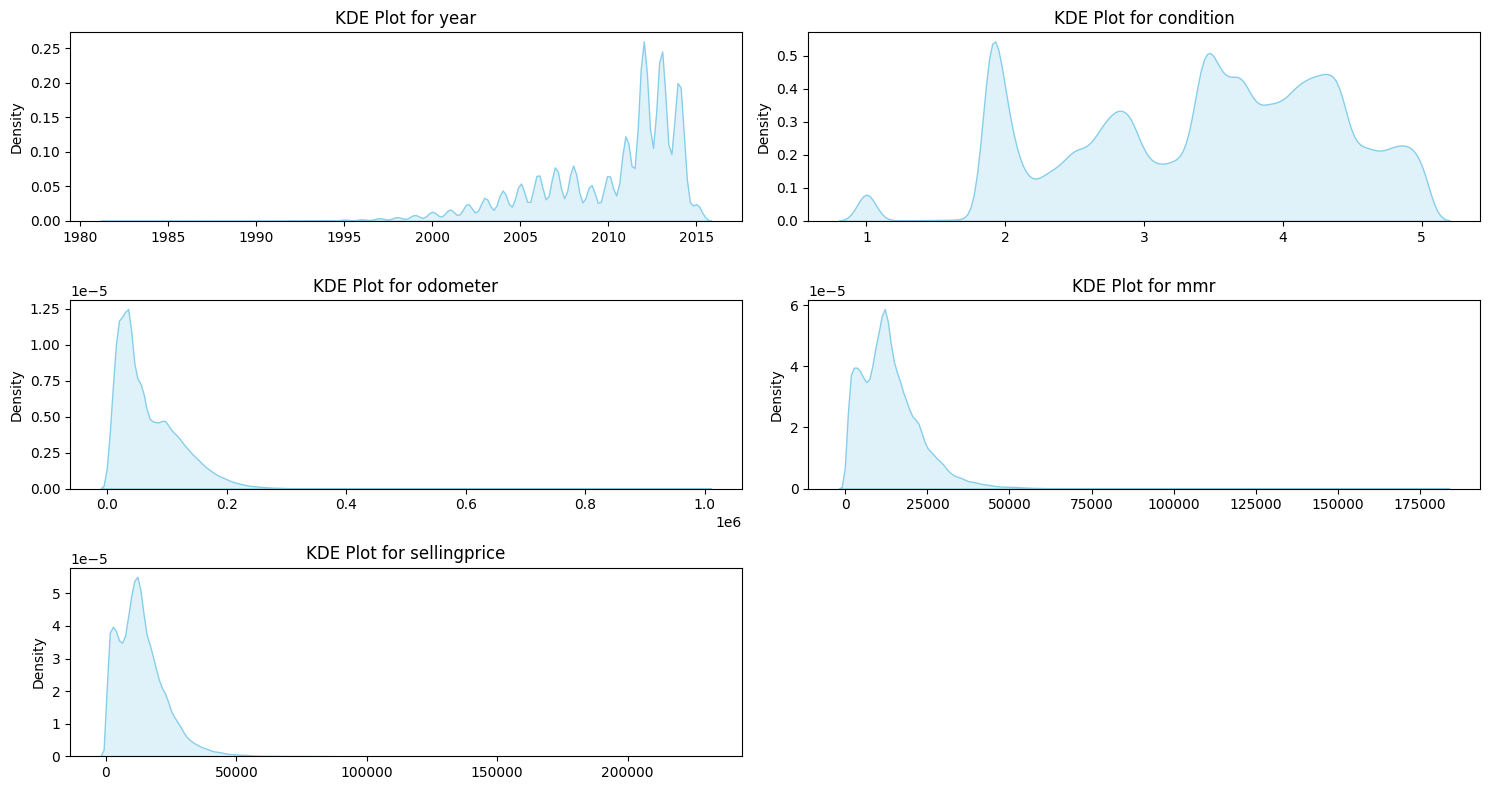

In [46]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Define the number of rows and columns for subplots
num_cols = len(num_features)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows required

# Loop through each numerical feature and plot its KDE
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, 2, i + 1)  # Set 2 columns per row
    sns.kdeplot(data=car_df[feature], color='skyblue', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Violin Plot for numericals</b></font></div>

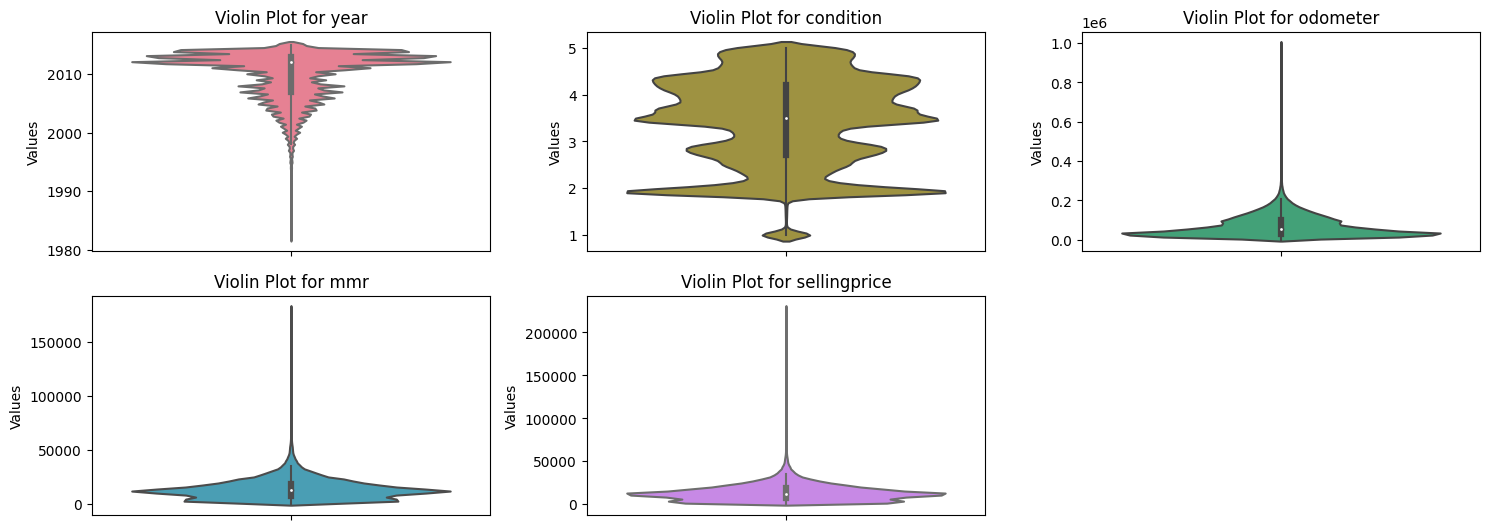

In [47]:
# Set a custom palette for the violins
custom_palette = sns.color_palette("husl", n_colors=len(num_features))

# Set the figure size
plt.figure(figsize=(15, 8))

# Loop through each numerical feature and plot enhanced violin plots
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=car_df[num_features[i]], palette=[custom_palette[i]], split=True)
    plt.title(f'Violin Plot for {feature}')
    plt.xlabel('')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Counting categroicals</b></font></div>

In [48]:
def categorise_top(dataframe, column_name, top_n):
    """
    Function to categorise values not in the top N categories as 'Others'.

    Parameters:
    dataframe (DataFrame): The pandas DataFrame containing the data.
    column_name (str): The name of the column containing categorical information.
    top_n (int): The number of top categories to consider.

    Returns:
    DataFrame: DataFrame with values not in the top N categories categorised as 'Others'.
    """
    top_values = dataframe[column_name].value_counts().head(top_n).index.tolist()
    dataframe[column_name] = dataframe[column_name].apply(lambda x: x if x in top_values else 'Others')
    return dataframe

In [49]:
#Function to make a count plot
def plot_countplot(data, column, colour, fig_width=15, fig_height=3):
    plt.figure(figsize=(fig_width, fig_height))
    plt.subplot(1, 3, 1)
    sns.countplot(x=data[column], color=colour)
    plt.xticks(rotation=45)
    plt.title(f'Count of {column.capitalize()}')
    plt.tight_layout()

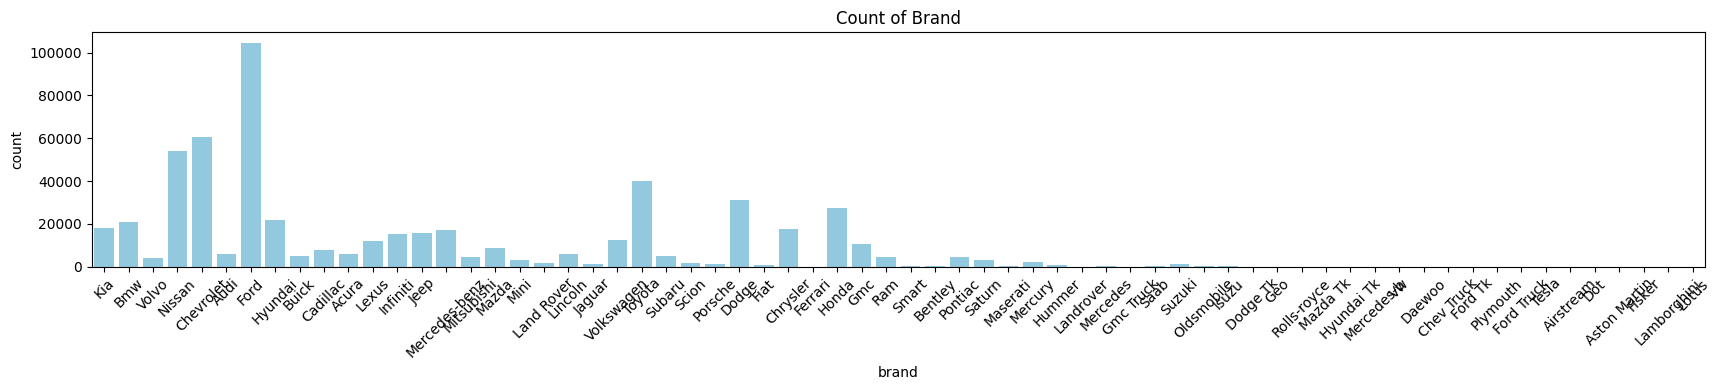

In [50]:
plot_countplot(car_df, 'brand', 'skyblue', fig_width=50, fig_height=4)

In [51]:
top_n = 10
car_df = categorise_top(car_df, 'brand', top_n)
print("Updated 'brand' column with top", top_n, "brands and 'Others':")
print(car_df['brand'].value_counts())

Updated 'brand' column with top 10 brands and 'Others':
Others       163439
Ford         104298
Chevrolet     60587
Nissan        54017
Toyota        39966
Dodge         30955
Honda         27351
Hyundai       21836
Bmw           20793
Kia           18084
Chrysler      17485
Name: brand, dtype: int64


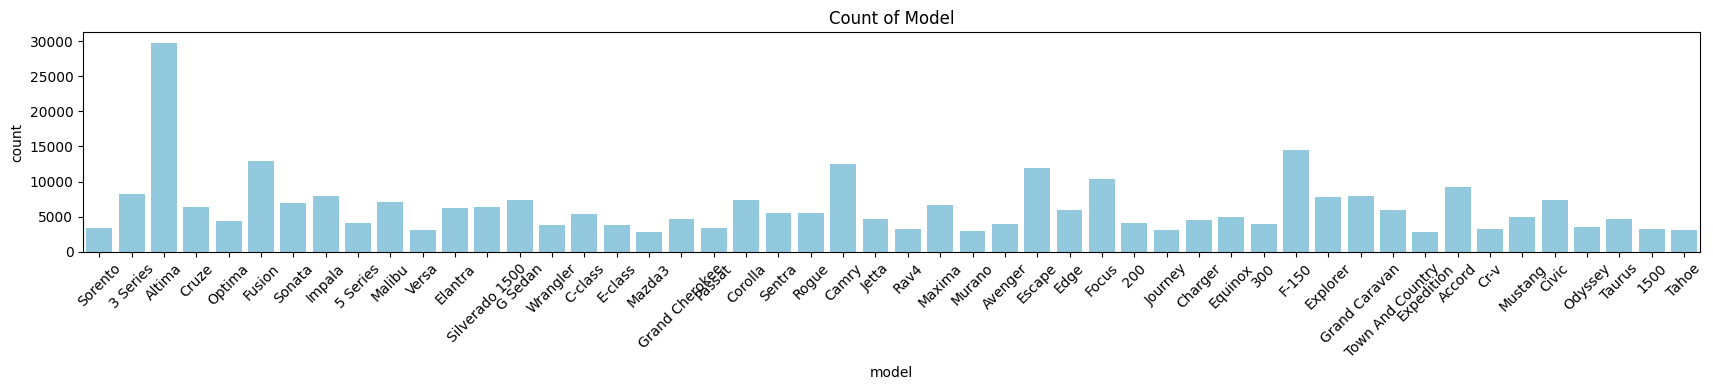

In [52]:
# Get the top 20 most frequent values in the 'model' column
top_20_models = car_df['model'].value_counts().head(50).index.tolist()

# Filter the DataFrame to include only the top 20 models
filtered_car_df = car_df[car_df['model'].isin(top_20_models)]

# Plot the count of the top 20 models using the plot_countplot function
plot_countplot(filtered_car_df, 'model', 'skyblue', fig_width=50, fig_height=4)

In [53]:
top_n = 10
car_df = categorise_top(car_df, 'model', top_n)
print("Updated 'model' column with top", top_n, "models and 'Others':")
print(car_df['model'].value_counts())

Updated 'model' column with top 10 models and 'Others':
Others           433540
Altima            29748
F-150             14479
Fusion            12946
Camry             12549
Escape            11893
Focus             10399
Accord             9155
3 Series           8204
Impala             7957
Grand Caravan      7941
Name: model, dtype: int64


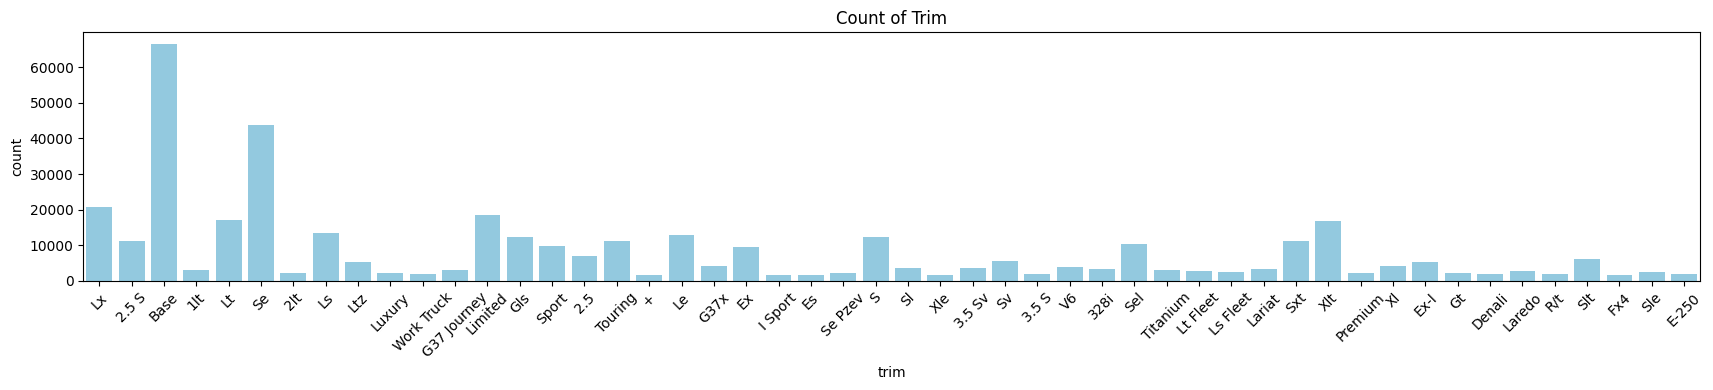

In [54]:
# Get the top 20 most frequent values in the 'trim' column
top_20_models = car_df['trim'].value_counts().head(50).index.tolist()

# Filter the DataFrame to include only the top 20 models
filtered_car_df = car_df[car_df['trim'].isin(top_20_models)]

# Plot the count of the top 20 models using the plot_countplot function
plot_countplot(filtered_car_df, 'trim', 'skyblue', fig_width=50, fig_height=4)

In [55]:
top_n = 10
car_df = categorise_top(car_df, 'trim', top_n)
print("Updated 'trim' column with top", top_n, "trims and 'Others':")
print(car_df['trim'].value_counts())

Updated 'trim' column with top 10 trims and 'Others':
Others     324670
Base        66493
Se          43691
Lx          20782
Limited     18369
Lt          16984
Xlt         16745
Ls          13535
Le          12929
Gls         12333
S           12280
Name: trim, dtype: int64


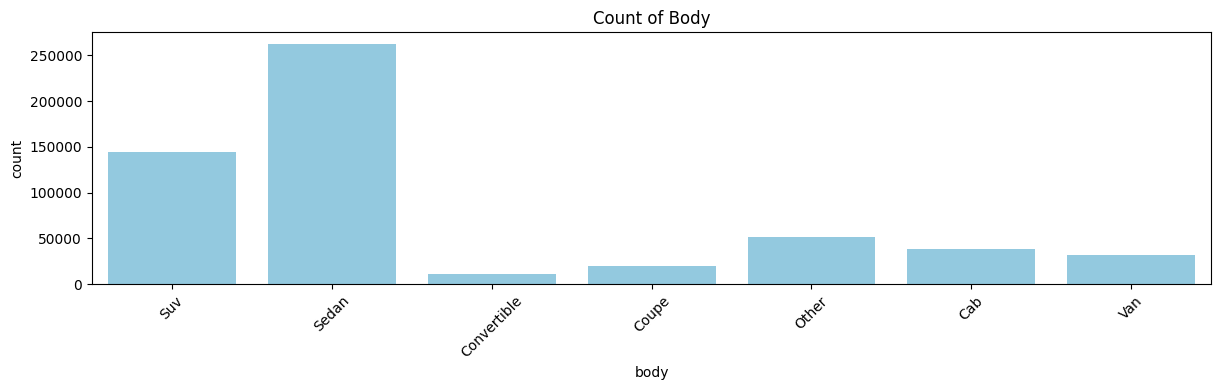

In [56]:
plot_countplot(car_df, 'body', 'skyblue', fig_width=35, fig_height=4)

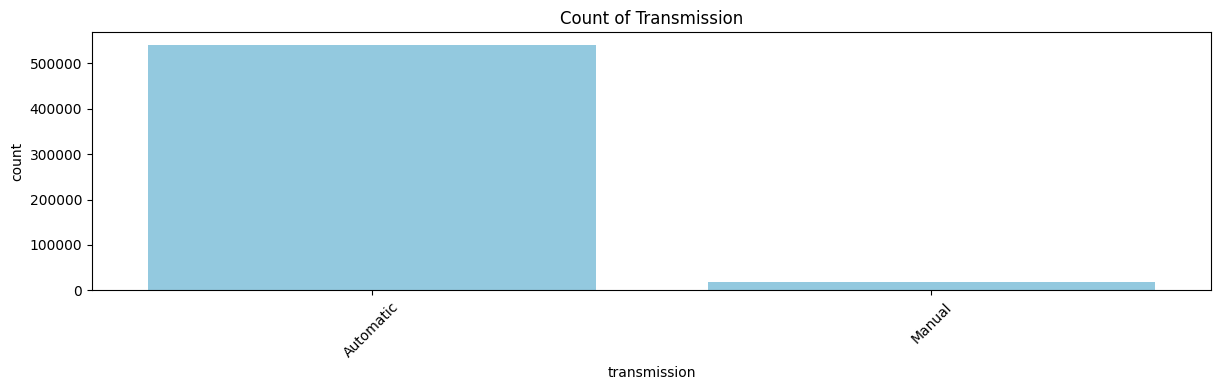

In [57]:
plot_countplot(car_df, 'transmission', 'skyblue', fig_width=35, fig_height=4)

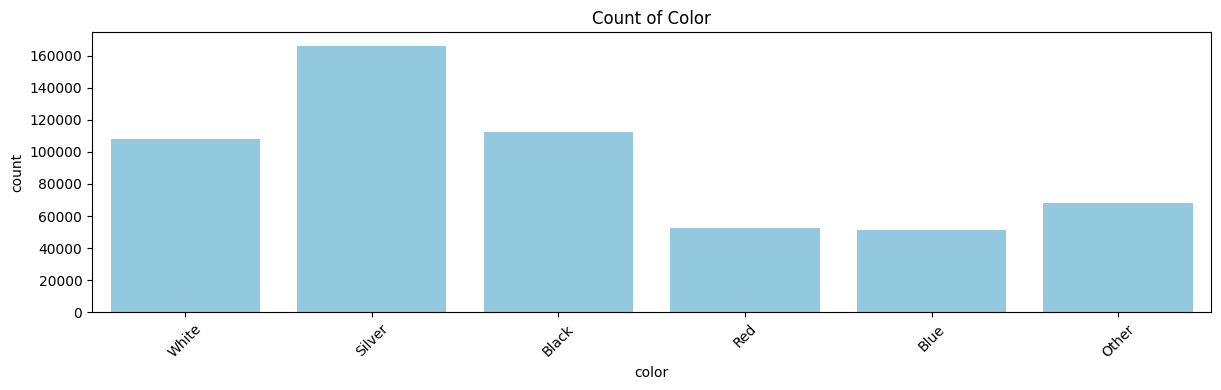

In [58]:
plot_countplot(car_df, 'color', 'skyblue', fig_width=35, fig_height=4)

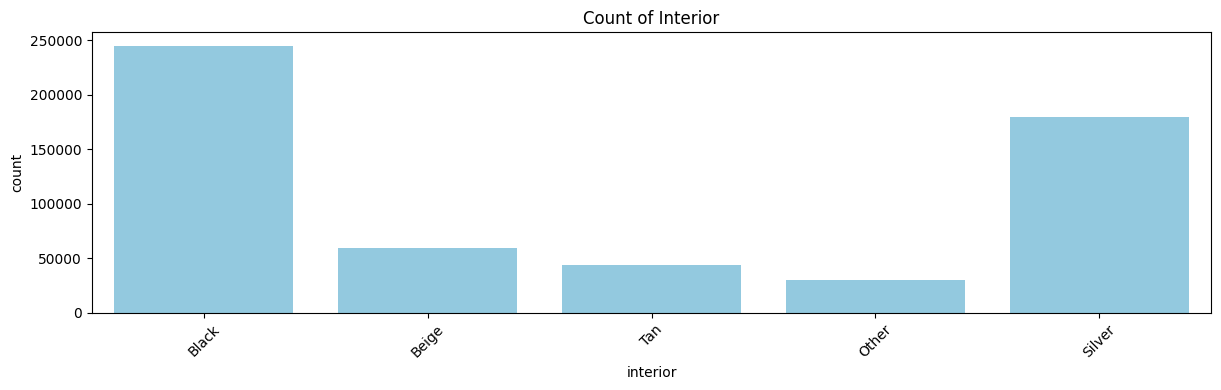

In [59]:
plot_countplot(car_df, 'interior', 'skyblue', fig_width=35, fig_height=4)

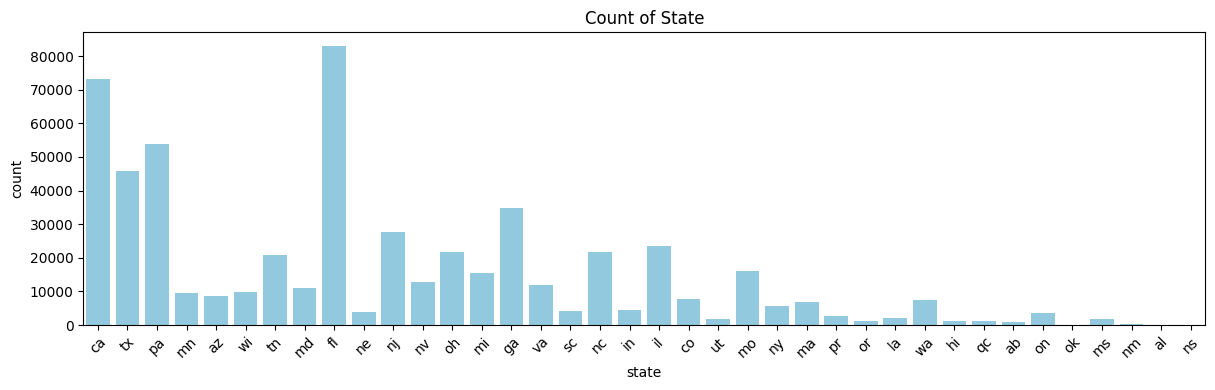

In [60]:
plot_countplot(car_df, 'state', 'skyblue', fig_width=35, fig_height=4)

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Multivariate Analysis</h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Scatter matrix</b></font></div>

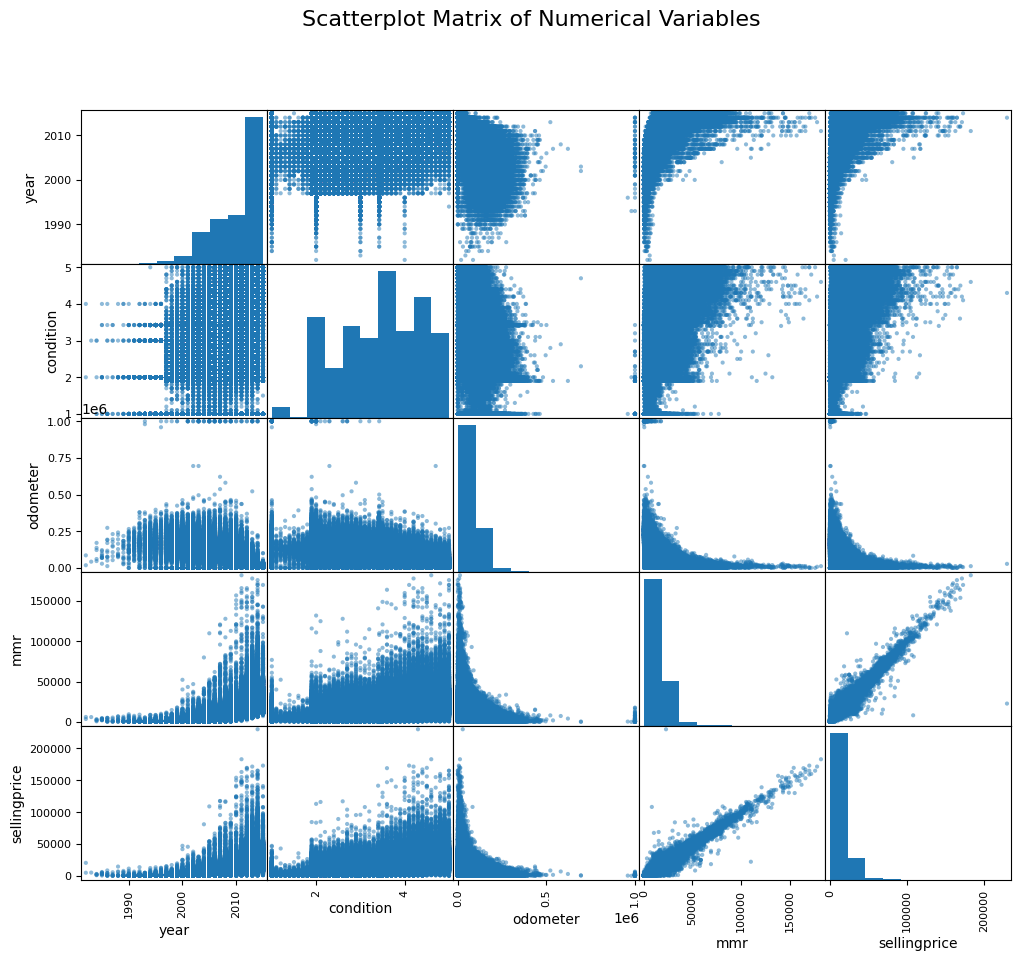

In [61]:
# Assuming 'num_features' contains the list of numerical features
numerical_corr = car_df[num_features].corr()

# Creating a scatterplot matrix
scatter_matrix(car_df[num_features], figsize=(12, 10))
plt.suptitle('Scatterplot Matrix of Numerical Variables', fontsize=16)
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Comparing categories with sellingprice</b></font></div>

In [62]:
def top_10_sellingprice (df, categorical_column, numerical_column):
    top_categories = df[categorical_column].value_counts().head(10).index.tolist()
    
    # Filter the dataframe to include data only for the top categories in the specified column
    top_categories_data = df[df[categorical_column].isin(top_categories)]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_column, y=numerical_column, data=top_categories_data)
    
    plt.title(f'Comparison of {numerical_column.capitalize()} by {categorical_column.capitalize()} (Top 10)', fontsize=16)
    plt.xlabel(f'{categorical_column.capitalize()}')
    plt.ylabel(f'{numerical_column.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()


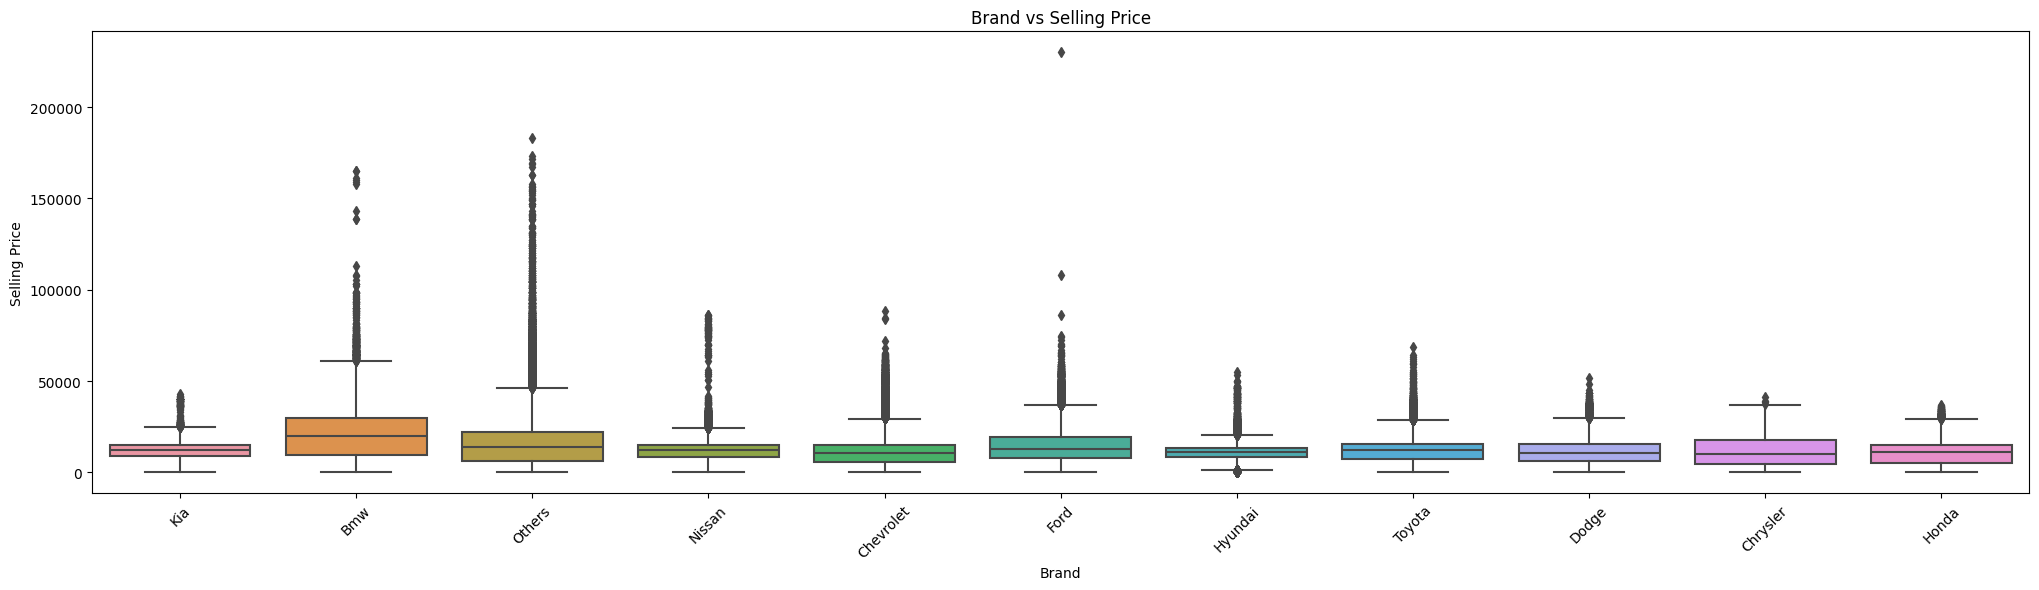

In [63]:
#Selecting a categorical column ('brand') to visualise its relationship with 'sellingprice'
categorical_column = 'brand'

#Creating a box plot to show 'sellingprice' distribution across different categories of 'brand'
plt.figure(figsize=(25, 6))
sns.boxplot(x=categorical_column, y='sellingprice', data=car_df)
plt.title(f'{categorical_column.capitalize()} vs Selling Price')
plt.xlabel(categorical_column.capitalize())
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

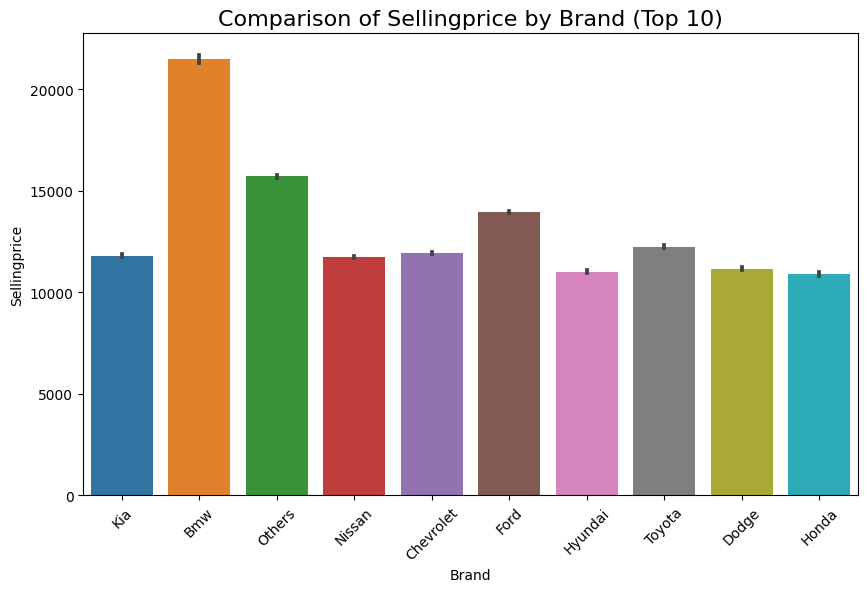

In [64]:
top_10_sellingprice(car_df, 'brand', 'sellingprice')

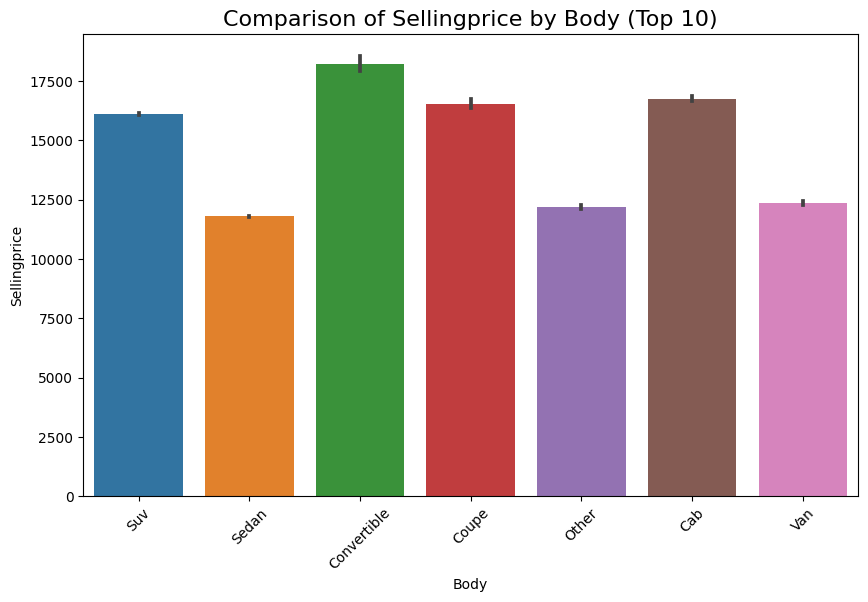

In [65]:
top_10_sellingprice(car_df, 'body', 'sellingprice')

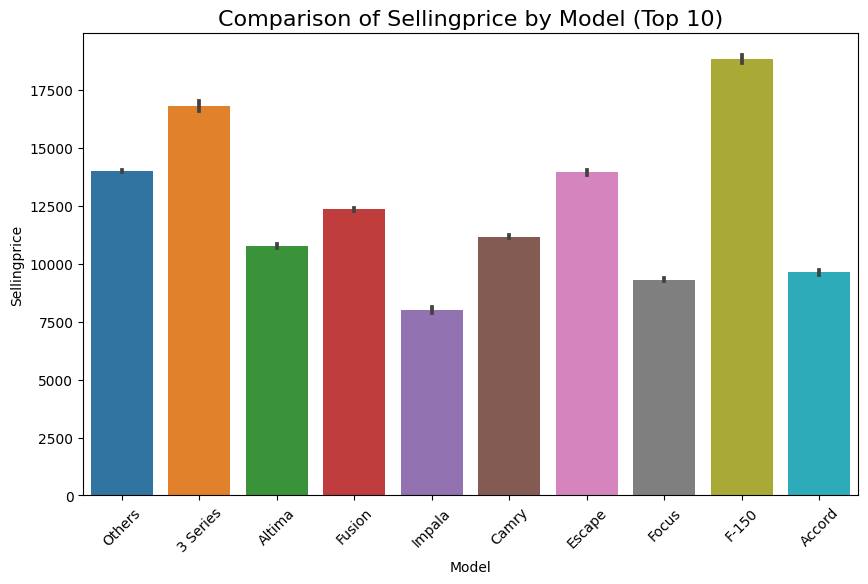

In [66]:
top_10_sellingprice(car_df, 'model', 'sellingprice')

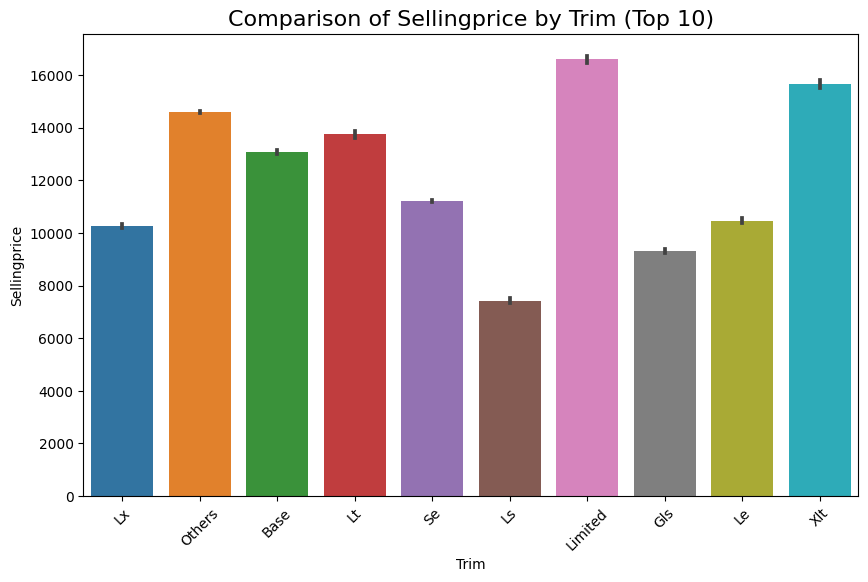

In [67]:
top_10_sellingprice(car_df, 'trim', 'sellingprice')

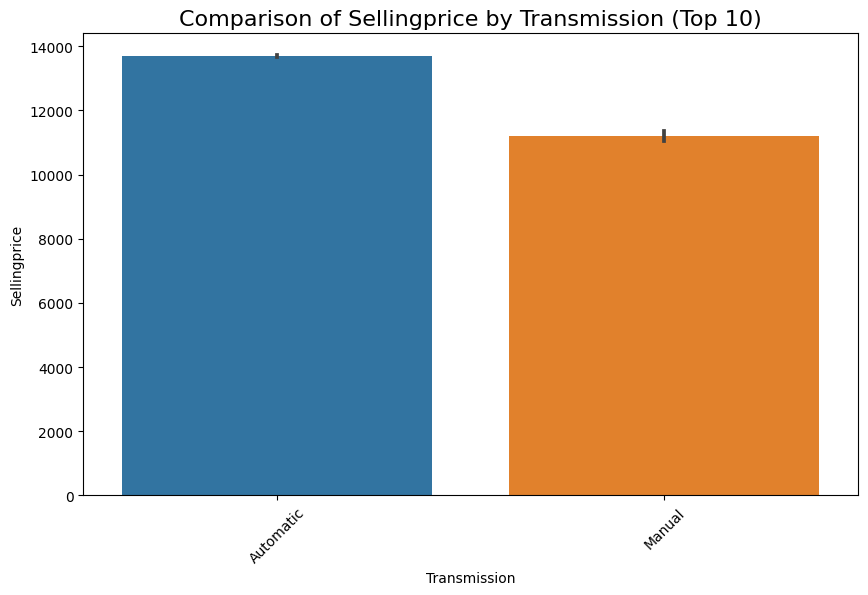

In [68]:
top_10_sellingprice(car_df, 'transmission', 'sellingprice')

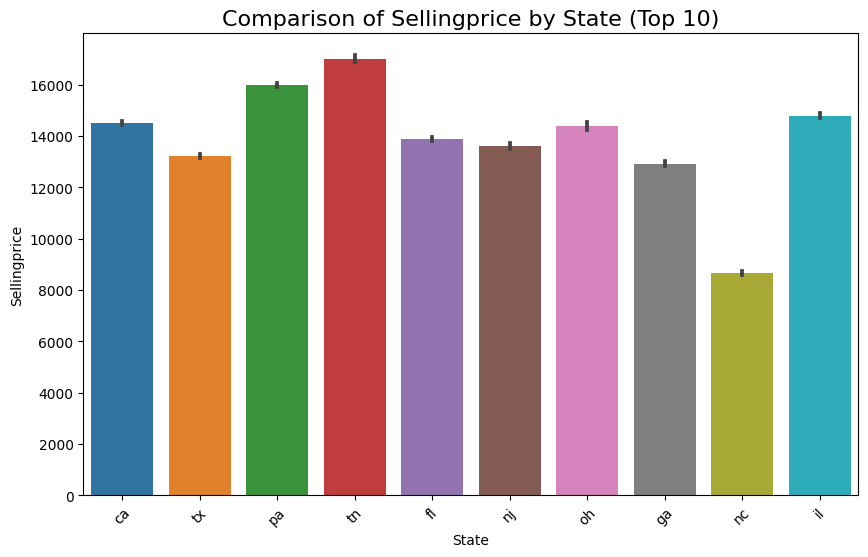

In [69]:
top_10_sellingprice(car_df, 'state', 'sellingprice')

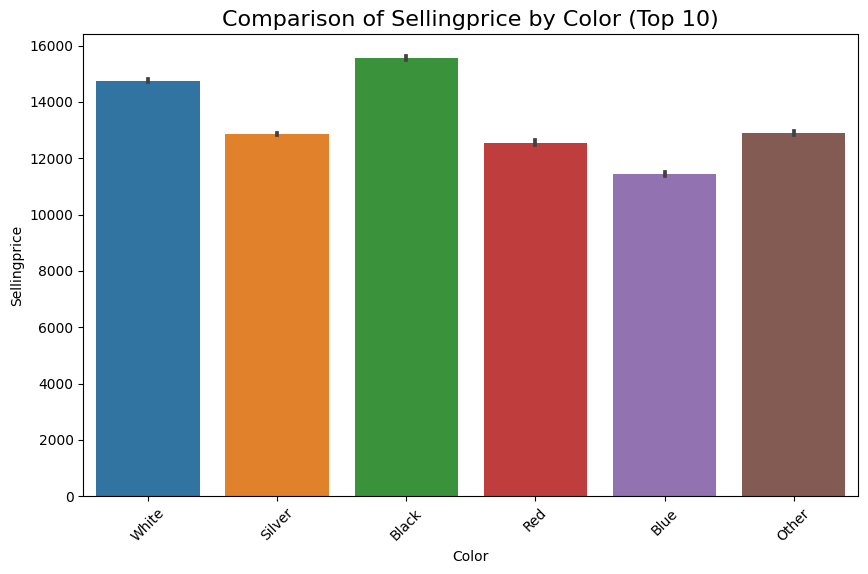

In [70]:
top_10_sellingprice(car_df, 'color', 'sellingprice')

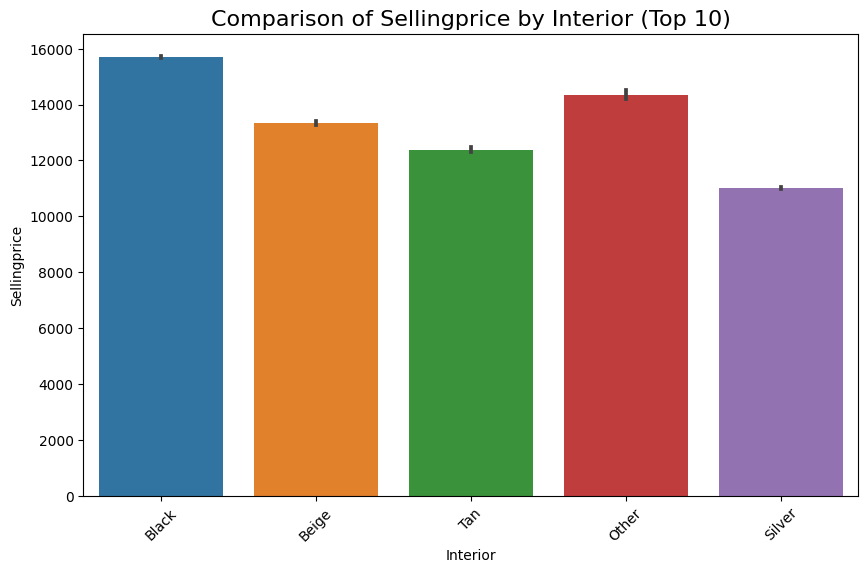

In [71]:
top_10_sellingprice(car_df, 'interior', 'sellingprice')

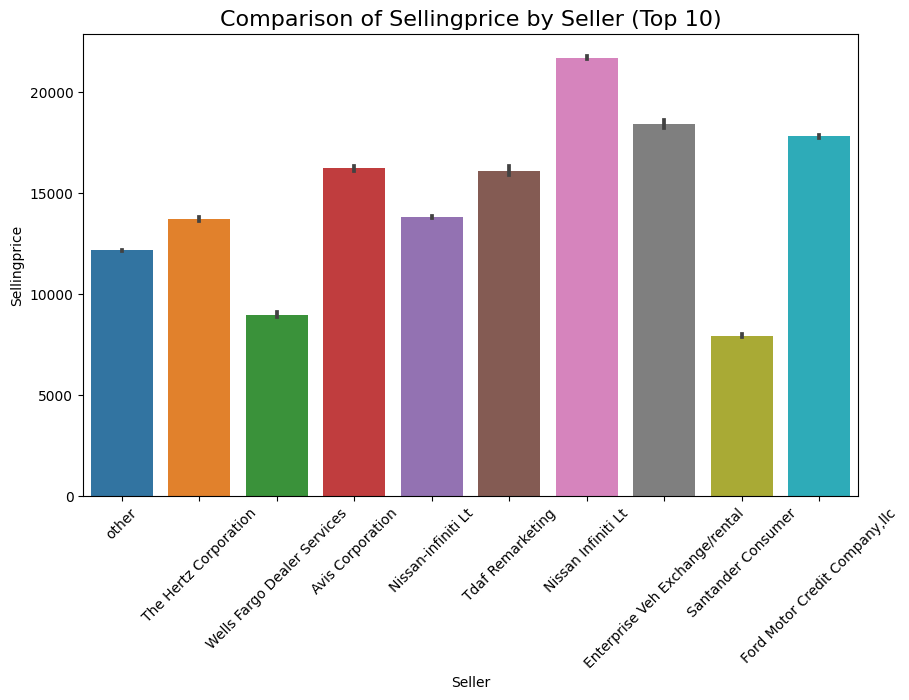

In [72]:
top_10_sellingprice(car_df, 'seller', 'sellingprice')

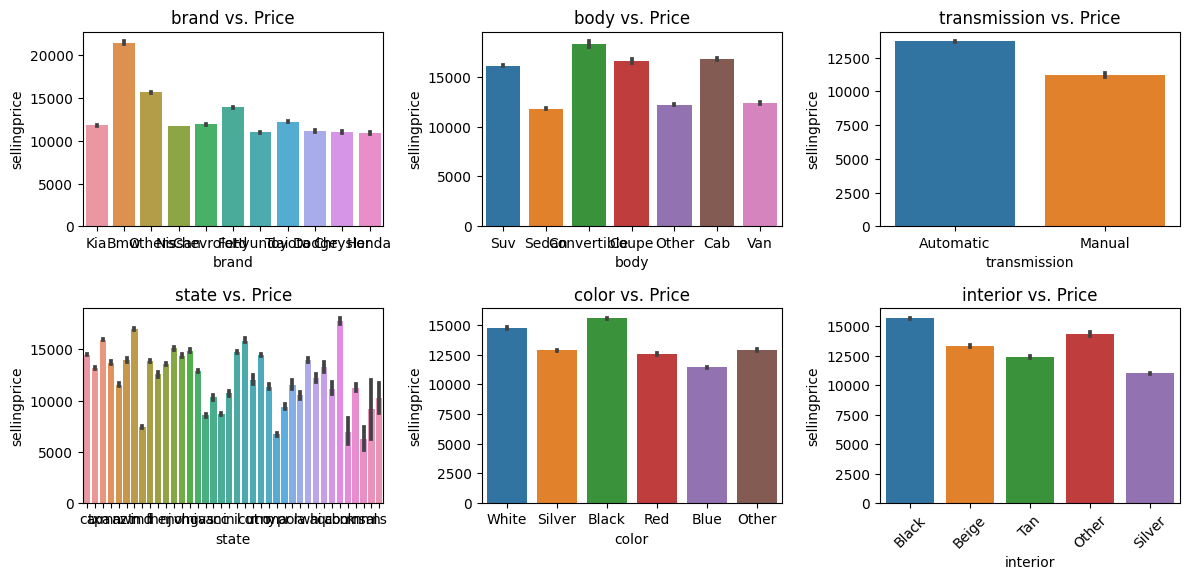

In [73]:
#Comparing different features to the price
categrical_columns=['brand', 'body', 'transmission', 'state', 'color', 'interior']
plt.figure(figsize=(12,8))
for feature in categrical_columns:
    plt.subplot(3, 3, categrical_columns.index(feature) + 1)
    sns.barplot(data=car_df, x=feature, y='sellingprice')
    plt.title(f'{feature} vs. Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Form the previous graphs weve seen that...:
- Ford is the most sold car, followed by chevrolet and nissan
- Sedans the most popular body types are
- Black the favourite colour is

In [74]:
# Calculate descriptive statistics for selling prices
price_stats = car_df['sellingprice'].describe()

# Displaying the statistics
print("Summary statistics for selling prices:\n")
print(price_stats)

# Finding the highest and lowest prices
highest_price = car_df['sellingprice'].max()
lowest_price = car_df['sellingprice'].min()

# Displaying the highest and lowest prices
print(f"\nHighest price: ${highest_price}\n")
print(f"Lowest price: ${lowest_price}\n")

Summary statistics for selling prices:

count    558811.000000
mean      13611.262461
std        9749.656919
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Highest price: $230000

Lowest price: $1



In [75]:
car_df['condition'].unique().round(2)

array([5.  , 4.5 , 4.1 , 4.3 , 1.  , 3.4 , 2.  , 4.2 , 3.  , 4.8 , 3.42,
       4.9 , 1.7 , 1.9 , 2.9 , 3.8 , 4.4 , 4.7 , 3.2 , 4.  , 2.5 , 3.7 ,
       3.9 , 3.1 , 2.8 , 4.6 , 3.6 , 3.5 , 2.6 , 2.1 , 2.2 , 2.7 , 2.4 ,
       3.3 , 2.3 , 1.5 , 1.6 , 1.8 , 1.2 , 1.4 , 1.1 , 1.3 ])

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 4</span>
    <h1 style="font-size: 30px;">Feature Engineering</h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>new_saledate_format</b></font></div>

In [76]:
# Clean 'saledate' column and convert to datetime
car_df['saledate'] = pd.to_datetime(car_df['saledate'].str.replace(r' GMT[-+]\d{4} \(\w{3}\)', '', regex=True).str.strip(), errors='coerce')

# Create 'new_saledate_format' column with desired format
car_df['new_saledate_format'] = car_df['saledate'].dt.strftime('%b %Y')

# Extract date part and calculate time span
car_df['date_part'] = pd.to_datetime(car_df['saledate'].dt.strftime('%Y-%m-%d'), errors='coerce')
min_date = car_df['date_part'].min()
max_date = car_df['date_part'].max()

# Display date information
print(car_df[['saledate', 'new_saledate_format']])
print(car_df[['saledate', 'date_part']])
print(f"Min Date: {min_date}\nMax Date: {max_date}\nTime Span: {max_date - min_date}")

                  saledate new_saledate_format
0      2014-12-16 12:30:00            Dec 2014
1      2014-12-16 12:30:00            Dec 2014
2      2015-01-15 04:30:00            Jan 2015
3      2015-01-29 04:30:00            Jan 2015
4      2014-12-18 12:30:00            Dec 2014
...                    ...                 ...
558806 2015-07-09 07:00:00            Jul 2015
558807 2015-07-08 09:30:00            Jul 2015
558808 2015-07-08 09:30:00            Jul 2015
558809 2015-07-09 06:45:00            Jul 2015
558810 2015-05-28 05:30:00            May 2015

[558811 rows x 2 columns]
                  saledate  date_part
0      2014-12-16 12:30:00 2014-12-16
1      2014-12-16 12:30:00 2014-12-16
2      2015-01-15 04:30:00 2015-01-15
3      2015-01-29 04:30:00 2015-01-29
4      2014-12-18 12:30:00 2014-12-18
...                    ...        ...
558806 2015-07-09 07:00:00 2015-07-09
558807 2015-07-08 09:30:00 2015-07-08
558808 2015-07-08 09:30:00 2015-07-08
558809 2015-07-09 06:45:00 20

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>care_age</b></font></div>

In [77]:
# Extract the year of sale from 'saledate' and convert to datetime if not already in datetime format
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')
car_df['year_of_sale'] = car_df['saledate'].dt.year

# Assuming the column 'manufacture_year' represents the year of manufacture
# Calculate 'car_age' by subtracting the manufacture year from the year of sale
car_df['car_age'] = car_df['year_of_sale'] - car_df['year']

# Display the DataFrame with the newly added 'car_age' column
print(car_df[['saledate', 'year', 'year_of_sale', 'car_age']])

                  saledate  year  year_of_sale  car_age
0      2014-12-16 12:30:00  2015          2014       -1
1      2014-12-16 12:30:00  2015          2014       -1
2      2015-01-15 04:30:00  2014          2015        1
3      2015-01-29 04:30:00  2015          2015        0
4      2014-12-18 12:30:00  2014          2014        0
...                    ...   ...           ...      ...
558806 2015-07-09 07:00:00  2015          2015        0
558807 2015-07-08 09:30:00  2012          2015        3
558808 2015-07-08 09:30:00  2012          2015        3
558809 2015-07-09 06:45:00  2015          2015        0
558810 2015-05-28 05:30:00  2014          2015        1

[558811 rows x 4 columns]


In [78]:
# Filter the DataFrame for rows where 'car_age' is less than 0 and count the occurrences
negative_car_age_count = (car_df['car_age'] < 0).sum()

# Display the count of rows where 'car_age' is less than 0
print(f"Number of rows where car_age is less than 0: {negative_car_age_count}")

Number of rows where car_age is less than 0: 201


In [79]:
# Filter the DataFrame to keep rows where 'car_age' is greater than or equal to 0
car_df = car_df[car_df['car_age'] >= 0]

In [80]:
# Count of rows in the DataFrame after dropping rows with negative 'car_age'
row_count = len(car_df)
print(f"New row count: {row_count}")

New row count: 558610


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>mileage_per_year</b></font></div>

In [81]:
# Calculate current year for reference
current_year = datetime.datetime.now().year

# Calculate mileage per year by dividing odometer reading by car age
car_df['mileage_per_year'] = car_df['odometer'] / car_df['car_age']


In [82]:
car_df.sample(10)

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,brand_model,new_saledate_format,date_part,year_of_sale,car_age,mileage_per_year
100231,2007,Chevrolet,Impala,Lt,Sedan,Automatic,2g1wt58kx79274268,il,2.0,54615.0,...,other,6375,2500,2015-01-15 02:00:00,Chevrolet_Impala,Jan 2015,2015-01-15,2015,8,6826.875000
432565,2012,Nissan,Others,S,Suv,Automatic,jn8as5mv7cw380400,pa,3.4,34360.0,...,Nissan-infiniti Lt,16600,15200,2015-05-22 02:00:00,Nissan_Rogue,May 2015,2015-05-22,2015,3,11453.333333
244025,2009,Others,Others,Others,Sedan,Automatic,wddgf54x79f240941,ca,4.0,109767.0,...,other,10600,12500,2015-02-18 04:30:00,Mercedes-benz_C-class,Feb 2015,2015-02-18,2015,6,18294.500000
491536,2013,Nissan,Others,Others,Sedan,Automatic,1n4aa5ap8dc828124,az,2.5,47251.0,...,The Hertz Corporation,14050,14300,2015-06-04 05:30:00,Nissan_Maxima,Jun 2015,2015-06-04,2015,2,23625.500000
357341,2005,Others,Others,Others,Suv,Automatic,1j4fa39s25p313489,fl,2.7,57285.0,...,Tdaf Remarketing,13200,15500,2015-02-24 01:00:00,Jeep_Wrangler,Feb 2015,2015-02-24,2015,10,5728.500000
353630,2007,Honda,Others,Others,Coupe,Automatic,2hgfg12857h584062,ca,3.0,145698.0,...,other,4750,4500,2015-02-24 04:00:00,Honda_Civic,Feb 2015,2015-02-24,2015,8,18212.250000
57269,2008,Chrysler,Others,Others,Other,Automatic,2a8gm68x98r638359,in,3.5,109211.0,...,other,4700,3400,2015-01-15 02:00:00,Chrysler_Pacifica,Jan 2015,2015-01-15,2015,7,15601.571429
232539,2014,Dodge,Others,Others,Coupe,Automatic,2c3cdyag9eh299457,tx,3.5,5896.0,...,Chrysler Capital,19850,19000,2015-02-04 02:30:00,Dodge_Challenger,Feb 2015,2015-02-04,2015,1,5896.000000
249692,2012,Ford,F-150,Others,Other,Automatic,1ftfw1et9ckd63990,tx,3.9,62630.0,...,other,26900,28100,2015-02-04 02:15:00,Ford_F-150,Feb 2015,2015-02-04,2015,3,20876.666667
177802,2007,Nissan,Altima,Others,Sedan,Automatic,1n4al21e67c161324,fl,2.0,122359.0,...,"Jpmorgan Chase Bank,n.a.",5400,4700,2015-01-27 01:30:00,Nissan_Altima,Jan 2015,2015-01-27,2015,8,15294.875000


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>market-price-deviation</b></font></div>

In [83]:
# Calculate deviation by subtracting 'mmr' from 'sellingprice'
car_df['market_price_deviation'] = car_df['sellingprice'] - car_df['mmr']

# Display the DataFrame with the added 'market_price_deviation' column
print(car_df[['mmr', 'sellingprice', 'market_price_deviation']])

          mmr  sellingprice  market_price_deviation
2       31900         30000                   -1900
3       27500         27750                     250
4       66000         67000                    1000
6       69000         65000                   -4000
7       11900          9800                   -2100
...       ...           ...                     ...
558806  35300         33000                   -2300
558807  30200         30800                     600
558808  29800         34000                    4200
558809  15100         11100                   -4000
558810  29600         26700                   -2900

[558610 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Removing Outliers</b></font></div>

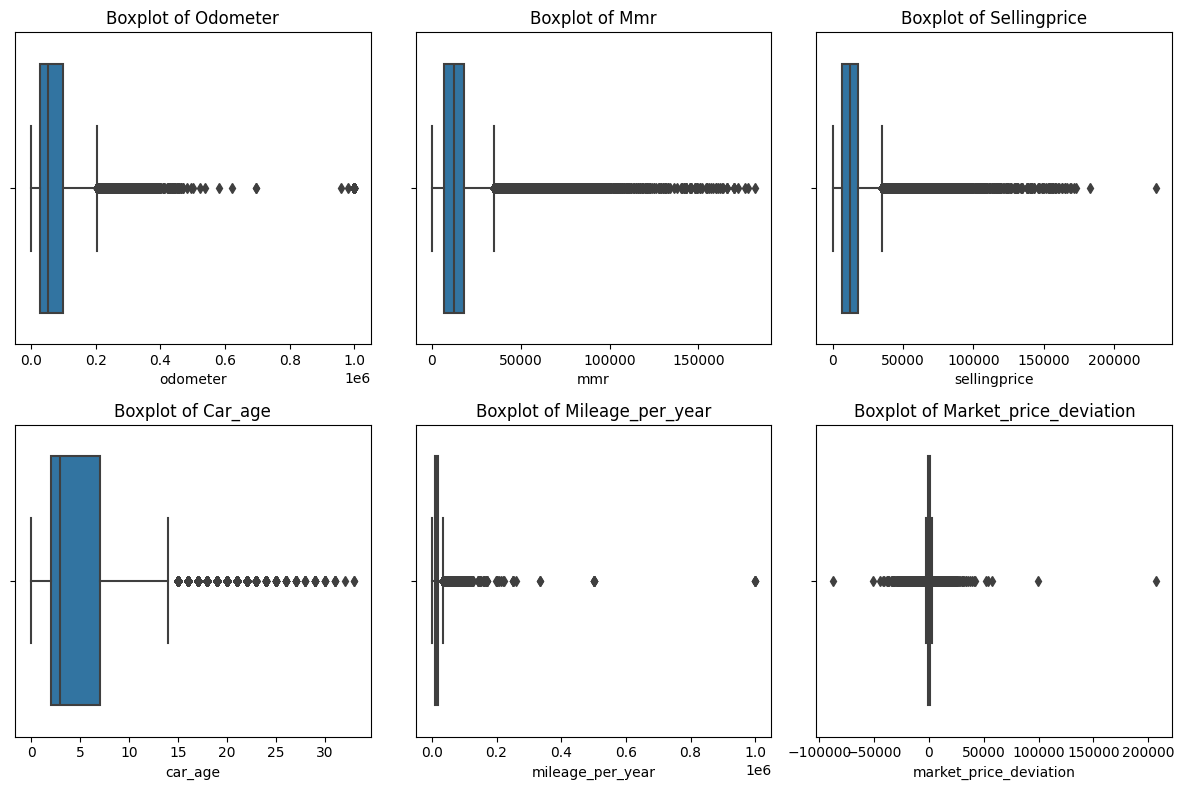

In [84]:
# Define columns for box plots
columns_for_boxplots = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column_name in enumerate(columns_for_boxplots, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=car_df[column_name])
    plt.title(f'Boxplot of {column_name.capitalize()}')

plt.tight_layout()
plt.show()


In [85]:
# Define columns to check for outliers
columns_to_check = ['year', 'odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Create an empty dictionary to store counts of outliers for each column
outliers_count = {}

# Iterate through each column and calculate the count of outliers using the IQR method
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)
    Q3 = car_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    # Count outliers and store the count in the dictionary
    outliers_count[column_name] = outliers_mask.sum()

# Display the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")

Number of outliers in 'year': 4021
Number of outliers in 'odometer': 10377
Number of outliers in 'mmr': 16258
Number of outliers in 'sellingprice': 16300
Number of outliers in 'car_age': 13832
Number of outliers in 'mileage_per_year': 34705
Number of outliers in 'market_price_deviation': 35086


In [86]:
# Define columns to impute outliers in
columns_to_check = ['year', 'odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Iterate through each column and impute outliers with median
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)
    Q3 = car_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    # Replace outliers with median
    median_value = car_df[column_name].median()
    car_df.loc[outliers_mask, column_name] = median_value

In [87]:
# Define columns to check for outliers
columns_to_check = ['year', 'odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Create an empty dictionary to store counts of outliers for each column
outliers_count = {}

# Iterate through each column and calculate the count of outliers using the IQR method
for column_name in columns_to_check:
    Q1 = car_df[column_name].quantile(0.25)
    Q3 = car_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (car_df[column_name] < lower_threshold) | (car_df[column_name] > upper_threshold)

    # Count outliers and store the count in the dictionary
    outliers_count[column_name] = outliers_mask.sum()

# Display the count of outliers for each column
for column, count in outliers_count.items():
    print(f"Number of outliers in '{column}': {count}")

Number of outliers in 'year': 10739
Number of outliers in 'odometer': 3409
Number of outliers in 'mmr': 5238
Number of outliers in 'sellingprice': 5324
Number of outliers in 'car_age': 0
Number of outliers in 'mileage_per_year': 17910
Number of outliers in 'market_price_deviation': 17627


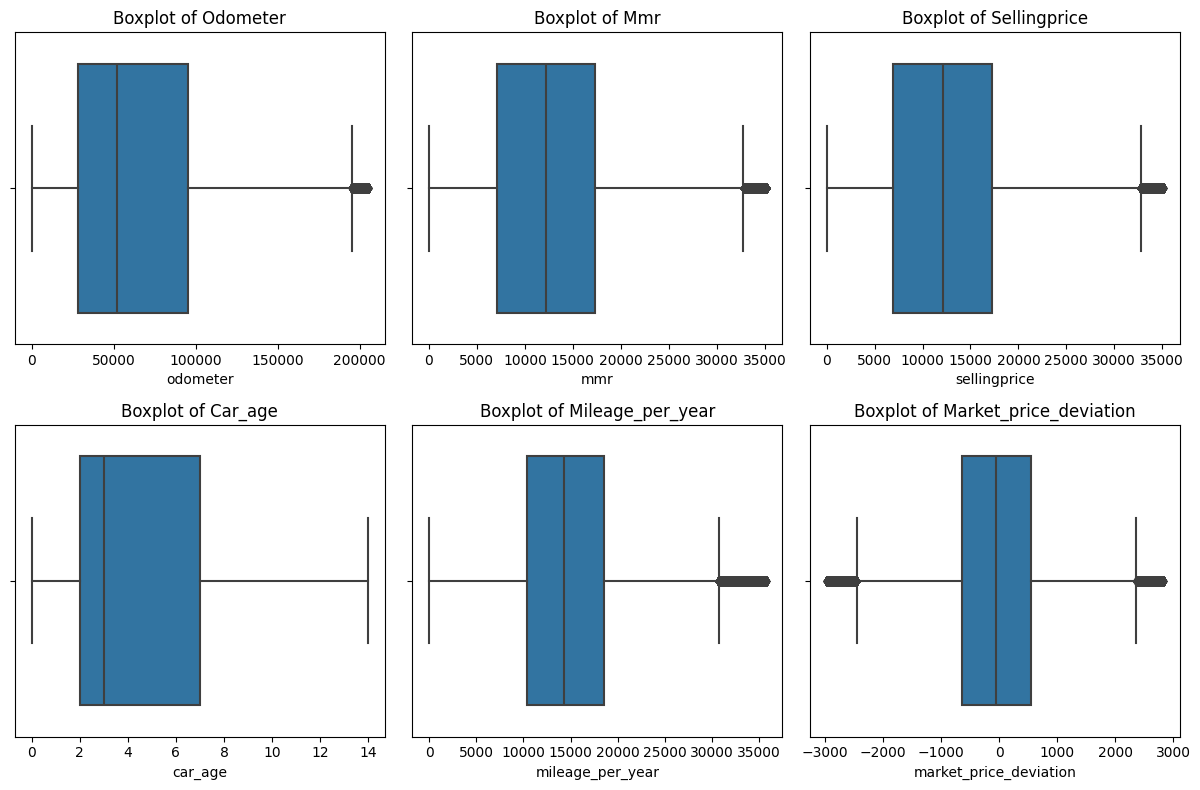

In [88]:
#Define columns for box plots
columns_for_boxplots = ['odometer', 'mmr', 'sellingprice', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column_name in enumerate(columns_for_boxplots, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=car_df[column_name])
    plt.title(f'Boxplot of {column_name.capitalize()}')

plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Correlation of numericals</b></font></div>

In [89]:
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print(numerical_col)

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale',
       'car_age', 'mileage_per_year', 'market_price_deviation'],
      dtype='object')


In [90]:
# Selecting numerical columns for basic statistics
numerical_features = ['condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale',
       'car_age', 'mileage_per_year', 'market_price_deviation']

# Calculating basic statistics using describe()
basic_stats = car_df[numerical_features].describe()

# Displaying basic statistics
print("Basic statistics for numerical features:")
print(basic_stats)

Basic statistics for numerical features:
           condition       odometer            mmr   sellingprice  \
count  558610.000000  558610.000000  558610.000000  558610.000000   
mean        3.424310   64749.593137   12788.208500   12626.761748   
std         0.939241   46461.765749    7573.681227    7656.071265   
min         1.000000       1.000000      25.000000       1.000000   
25%         2.700000   28398.000000    7100.000000    6900.000000   
50%         3.500000   52270.250000   12250.000000   12100.000000   
75%         4.200000   95267.000000   17350.000000   17250.000000   
max         5.000000  205203.000000   35100.000000   35100.000000   

        year_of_sale        car_age  mileage_per_year  market_price_deviation  
count  558610.000000  558610.000000     558610.000000           558610.000000  
mean     2014.904180       4.526571      15004.078383              -50.253646  
std         0.294344       3.450662       6758.448585             1043.209496  
min      2014.000

In [91]:
numerical_corr = car_df[num_features].corr()
numerical_corr["sellingprice"].sort_values(ascending=False)

sellingprice    1.000000
mmr             0.956775
year            0.634928
condition       0.561528
odometer       -0.622258
Name: sellingprice, dtype: float64

In [92]:
# Selecting numerical columns of interest
numerical_columns = ['condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale',
       'car_age', 'mileage_per_year', 'market_price_deviation']

# Calculating Pearson correlation
pearson_corr = car_df[numerical_columns].corr(method='pearson')['sellingprice'].sort_values(ascending=False)

# Calculating Spearman correlation
spearman_corr = car_df[numerical_columns].corr(method='spearman')['sellingprice'].sort_values(ascending=False)

print("Pearson correlation of numerical variables with 'sellingprice':")
print(pearson_corr)

print("\nSpearman correlation of numerical variables with 'sellingprice':")
print(spearman_corr)

Pearson correlation of numerical variables with 'sellingprice':
sellingprice              1.000000
mmr                       0.956775
condition                 0.561528
market_price_deviation    0.123530
year_of_sale              0.089303
mileage_per_year         -0.008901
car_age                  -0.592909
odometer                 -0.622258
Name: sellingprice, dtype: float64

Spearman correlation of numerical variables with 'sellingprice':
sellingprice              1.000000
mmr                       0.969457
condition                 0.590739
market_price_deviation    0.132102
year_of_sale              0.095639
mileage_per_year         -0.028964
car_age                  -0.605570
odometer                 -0.656513
Name: sellingprice, dtype: float64


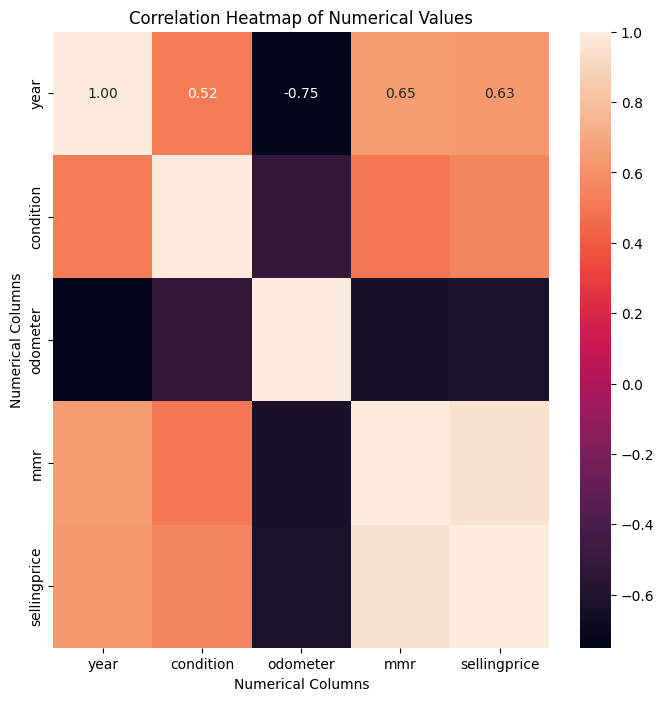

In [93]:
numerical_corr = car_df[num_features].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(numerical_corr, annot=True, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.title('Correlation Heatmap of Numerical Values')
plt.xlabel('Numerical Columns')
plt.ylabel('Numerical Columns')
plt.show()

> #### The correlation coefficients (Pearson and Spearman) between the numerical variables and the 'sellingprice' provide insights into the relationships between these variables:
>
> 1. Pearson Correlation:
>>    - The 'sellingprice' has a very strong positive correlation with 'mmr' (0.984), suggesting a high linear relationship between the maximum retail price ('mmr') and the selling price.
>>
>>    - A moderately positive correlation exists between 'sellingprice' and 'year' (0.586) and 'condition' (0.539). This indicates that newer years and better conditions tend to be associated with higher selling prices, but the relationship is not as strong as with 'mmr'.
>>
>>    - 'Sellingprice' has a moderately negative correlation with 'odometer' (-0.582), implying that as the odometer reading increases (indicating higher mileage), the selling price tends to decrease.
>>
>
> 2. Spearman Correlation:
>>    - The Spearman correlation coefficients show similar trends to the Pearson correlation, but they consider monotonic relationships rather than just linear ones.
>>
>>    - 'mmr' demonstrates a very strong positive monotonic relationship with 'sellingprice' (0.979).
>>
>>    - 'Year', 'condition', and 'odometer' also show relatively strong positive and negative monotonic relationships with 'sellingprice', similar to Pearson correlations but considering non-linear associations.
>>
> Conclusions:
>> - Both Pearson and Spearman correlations indicate that 'mmr' has the strongest association with 'sellingprice', suggesting that the maximum retail price is highly influential in determining the selling price of cars.
>>
>> - 'Year' and 'condition' have moderate positive associations, indicating that newer vehicles in better condition tend to have higher selling prices.
>>
>> - Conversely, 'odometer' (indicating higher mileage) has a moderate negative association, meaning that increased mileage tends to decrease the selling price.
>
> Correlation does not imply causation, and other factors not considered here might influence the selling price of cars. These correlation coefficients provide valuable insights into the relationships between these variables but do not establish causative relationships.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Feature Scaling/Normalisation</b></font></div>

In [94]:
# Summary statistics before preprocessing
print("Summary Statistics Before Preprocessing:")
print(car_df[numerical_columns].describe())

Summary Statistics Before Preprocessing:
           condition       odometer            mmr   sellingprice  \
count  558610.000000  558610.000000  558610.000000  558610.000000   
mean        3.424310   64749.593137   12788.208500   12626.761748   
std         0.939241   46461.765749    7573.681227    7656.071265   
min         1.000000       1.000000      25.000000       1.000000   
25%         2.700000   28398.000000    7100.000000    6900.000000   
50%         3.500000   52270.250000   12250.000000   12100.000000   
75%         4.200000   95267.000000   17350.000000   17250.000000   
max         5.000000  205203.000000   35100.000000   35100.000000   

        year_of_sale        car_age  mileage_per_year  market_price_deviation  
count  558610.000000  558610.000000     558610.000000           558610.000000  
mean     2014.904180       4.526571      15004.078383              -50.253646  
std         0.294344       3.450662       6758.448585             1043.209496  
min      2014.000

In [95]:
# Perform feature scaling (Standardisation - Z-score scaling) for numerical columns
scaler = StandardScaler()
car_df[numerical_columns] = scaler.fit_transform(car_df[numerical_columns])

In [96]:
# Summary statistics after preprocessing
print("\nSummary Statistics After Preprocessing:")
print(car_df[numerical_columns].describe())


Summary Statistics After Preprocessing:


          condition      odometer           mmr  sellingprice  year_of_sale  \
count  5.586100e+05  5.586100e+05  5.586100e+05  5.586100e+05  5.586100e+05   
mean  -1.064396e-15  3.279174e-17 -2.223427e-17 -1.240438e-16 -2.912974e-13   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.581140e+00 -1.393590e+00 -1.685207e+00 -1.649119e+00 -3.071846e+00   
25%   -7.711660e-01 -7.823987e-01 -7.510500e-01 -7.480033e-01  3.255372e-01   
50%    8.058659e-02 -2.685941e-01 -7.106306e-02 -6.880320e-02  3.255372e-01   
75%    8.258701e-01  6.568290e-01  6.023221e-01  6.038662e-01  3.255372e-01   
max    1.677623e+00  3.022992e+00  2.945967e+00  2.935351e+00  3.255372e-01   

            car_age  mileage_per_year  market_price_deviation  
count  5.586100e+05      5.586100e+05            5.586100e+05  
mean   9.198985e-17      9.081963e-16           -3.052761e-18  
std    1.000001e+00      1.000001e+00            1.000001e+00  
min   -1.311799e+00     -2.22004

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Feature Encoding</b></font></div>

Mapping the following features
- brand
- trim
- body
- color
- interior
- transmission

In [97]:
mapped_brand = {'Others': 0, 'Ford': 1, 'Chevrolet': 2, 'Nissan': 3, 'Toyota': 4, 
                'Dodge': 5, 'Honda': 6, 'Hyundai': 7, 'Bmw': 8, 'Kia': 9, 'Chrysler': 10}
car_df['brand_label'] = car_df['brand'].map(mapped_brand)


In [98]:
mapped_trim = {'Others': 0, 'Base': 1, 'Se': 2, 'Lx': 3, 'Limited': 4, 'Lt': 5,
               'Xlt': 6, 'Ls': 7, 'Le': 8, 'Gls': 9, 'S': 10}
car_df['trim_label'] = car_df['trim'].map(mapped_trim)

In [99]:
mapped_body = {'Other': 0, 'Sedan': 1, 'Suv': 2, 'Cab': 3, 'Van': 4, 'Coupe': 5, 'Convertible': 6}
car_df['body_label'] = car_df['body'].map(mapped_body)

In [100]:
mapped_color = {'Other': 0, 'Silver': 1, 'Black': 2, 'White': 3, 'Red': 4, 'Blue': 5}
car_df['color_label'] = car_df['color'].map(mapped_color)

In [101]:
mapped_interior = {'Other': 0, 'Black': 1, 'Silver': 2, 'Beige': 3, 'Tan': 4}
car_df['interior_label'] = car_df['interior'].map(mapped_interior)

In [102]:
mapped_transmission = {'Automatic': 0, 'Manual': 1}
car_df['transmission_label'] = car_df['transmission'].map(mapped_transmission)

In [103]:
car_df.sample(3)

,year,brand,model,trim,body,transmission,vin,state,condition,odometer,...,year_of_sale,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
9271,2011,Dodge,Others,Others,Suv,Automatic,1d4re5gg7bc720893,nc,1.145277,-0.598850,...,0.325537,-0.152600,-0.854128,-0.143544,5,0,2,1,1,0
33731,2013,Others,Others,Others,Suv,Automatic,jm3ke4ce9d0107649,fl,0.000215,-0.698136,...,-3.071846,-1.021999,2.561081,-2.108635,0,0,2,4,1,0
340866,2001,Toyota,Others,Others,Suv,Automatic,jt3hn86r519056039,fl,-0.558228,0.705062,...,0.325537,2.745397,-1.189508,2.204980,4,0,2,0,2,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Dropping Columns</b></font></div>

We don't need the following colomns: mmr, state, vin, seller, so we are dropping those columns

In [104]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'brand_model', 'new_saledate_format',
       'date_part', 'year_of_sale', 'car_age', 'mileage_per_year',
       'market_price_deviation', 'brand_label', 'trim_label', 'body_label',
       'color_label', 'interior_label', 'transmission_label'],
      dtype='object')

In [105]:
# List of columns to be dropped (replace with the columns you want to remove)
drop_colomns = ['mmr', 'state', 'vin', 'seller', 'saledate', 'new_saledate_format', 
                'date_part', 'year_of_sale']

# Drop the specified columns from the DataFrame
car_df = car_df.drop(columns=drop_colomns)

In [106]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label'],
      dtype='object')

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Dataset for Modelling</b></font></div>

Using feather to save the dataset to use for modelling

In [108]:
import pyarrow.feather as feather

# Assuming 'car_df' is your DataFrame
feather.write_feather(car_df, 'processed_data.feather')